# Data analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from itertools import product
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Now that the feature extraction of the different pole pictures and scans is reaching an advanced stage, it is a good moment to begin carrying out a proper data analysis process on the features extracted so far.

## Feature merging

The first step for analysing the features is merging everything together on a single CSV file

In [6]:
# Read full DF if it is present, merge all other DFs instead
if ('full_df.csv' not in os.listdir()):
    df_list = []

    df_paths = [path for path in os.listdir() if path.lower().endswith('.csv') and path != "full_df.csv"]
    for path in df_paths:
        df = pd.read_csv(path, index_col=['pole_id', 'height_id'])
        df_list.append(df)

    full_df = pd.concat(df_list, axis=1, join='inner').reset_index()
    full_df.to_csv('full_df.csv')

else:
    full_df = pd.read_csv('full_df.csv', index_col=['pole_id', 'height_id']).reset_index()

Now that all the information is in one DataFrame, it is possible to carry out a proper data analysis process on the pole data. Even if I know how I built the dataset, as a good practice, a good point to start the analysis is to get some general information from the dataset.

## General dataset information

In [7]:
full_df

pole_id  height_id  Unnamed: 0  red_hist_mean  red_hist_std  \
0         0          0           0      33.285507      4.835364   
1         0          1           1      35.829697      5.427175   
2         0          2           2      37.949654      7.135076   
3         0          3           3      40.802998      9.133465   
4         0          4           4      42.525814      9.575470   
5         0          5           5      43.471317      8.824857   
6         0          6           6      44.955284      8.230394   
7         0          7           7      45.278720      6.426979   
8         0          8           8      46.623856      5.541791   
9         0          9           9      43.637730      6.427815   
10       30          0          10      66.526340     11.946262   
11       30          1          11      77.947830     12.180227   
12       30          2          12      88.333870     11.658127   
13       30          3          13      92.234690     10.053293   
14       30          4          14      99.038950      7.577017   
15       30          5          15     102.625090      6.738677   
16       30          6          16     105.219406      5.330866   
17       30          7          17     114.391940      5.623160   
18       30          8          18     117.180550      5.644877   
19       30          9          19     111.867130      6.438106   
20       41          0          20      55.872746      5.812578   
21       41          1          21      59.106010      6.201283   
22       41          2          22      61.196033      6.418799   
23       41          3          23      60.593872      7.370744   
24       41          4          24      58.708096      7.083217   
25       41          5          25      59.700070      5.788186   
26       41          6          26      59.882343      7.235501   
27       41          7          27      58.726060      7.210362   
28       41          8          28      51.939384     10.591656   
29       41          9          29      45.864426      9.731524   
30        6          0          30      83.122360      8.348660   
31        6          1          31      91.652110      4.162422   
32        6          2          32      92.268490      6.825070   
33        6          3          33      90.141490      9.525866   
34        6          4          34      82.778920      4.627476   
35        6          5          35      91.485600      6.112926   
36        6          6          36      98.314280     10.874365   
37        6          7          37     101.034380     11.788608   
38        6          8          38      95.831300      9.065667   
39        6          9          39      93.536980     10.206712   
40        5          0          40      76.898470      5.636949   
41        5          1          41      81.579130      4.135943   
42        5          2          42      82.039154      6.394799   
43        5          3          43      86.614320      9.325790   
44        5          4          44      83.565410     11.684752   
45        5          5          45      80.484330      4.918766   
46        5          6          46      76.052470      5.725339   
47        5          7          47      79.956795      3.076451   
48        5          8          48      78.613500      3.629056   
49        5          9          49      79.045470      5.776356   

    green_hist_mean  green_hist_std  blue_hist_mean  blue_hist_std  \
0         26.735497        1.298076       23.705713       1.772956   
1         27.231295        1.663044       24.409092       1.308042   
2         27.734688        2.493108       25.227655       1.805359   
3         28.866690        3.269534       26.450733       1.511852   
4         28.284233        2.337356       26.577112       1.061055   
5         28.742222        1.602446       27.591710       1.161448   
6         30.336025        1.334914       28.688032       0.709175   
7         31.725018       

In [4]:
full_df.columns

Index(['pole_id', 'height_id', 'red_hist_mean', 'red_hist_std',
       'green_hist_mean', 'green_hist_std', 'blue_hist_mean', 'blue_hist_std',
       'kernel_0_mean', 'kernel_0_std', 'kernel_0_max', 'kernel_0_min',
       'kernel_1_mean', 'kernel_1_std', 'kernel_1_max', 'kernel_1_min',
       'kernel_10_mean', 'kernel_10_std', 'kernel_10_max', 'kernel_10_min',
       'kernel_11_mean', 'kernel_11_std', 'kernel_11_max', 'kernel_11_min',
       'kernel_12_mean', 'kernel_12_std', 'kernel_12_max', 'kernel_12_min',
       'kernel_13_mean', 'kernel_13_std', 'kernel_13_max', 'kernel_13_min',
       'kernel_14_mean', 'kernel_14_std', 'kernel_14_max', 'kernel_14_min',
       'kernel_15_mean', 'kernel_15_std', 'kernel_15_max', 'kernel_15_min',
       'kernel_16_mean', 'kernel_16_std', 'kernel_16_max', 'kernel_16_min',
       'kernel_17_mean', 'kernel_17_std', 'kernel_17_max', 'kernel_17_min',
       'kernel_2_mean', 'kernel_2_std', 'kernel_2_max', 'kernel_2_min',
       'kernel_3_mean', 'kernel_3

As it can be seen, this dataset has 50 observations. These correspond to the 5 different lab poles, each divided into 10 different chunks along its vertical axis. For each pole, there is information coming from different sources:

- Color histogram information from the camera pictures, both RGB histograms and grayscale histograms.
- Means, standard deviations, maxima and minima of the different Gabor kernel activations.
- Means and standard deviations of the hyperspectral scans. Unlike the previous feature set, instead of using the whole spectra, now its PCA conversion is being employed.
- Means, standard deviations and modes of the LiDAR diameter estimates.

In addition to this information, there is a set of groundtruth elements to predict:

- The average density in the surface of the pole, on its middle part, and on its core part.
- The height and diameter of the pole.

The most important difference with respect to the previous feature set is that, instead of aiming at predicting the given sensor score, now the aim is to predict the surface, middle and interior densites and the height, since this is a much more objective groundtruth. Also, instead of treating the whole pole as one observational unit, it is divided into equall-sized chunks, around 10 centimeters each. This way, not only we can get more observational units from one single pole, but we can make a more detailed analysis of each pole, as the density can change greatly across its vertical axis, and pole damage in the top part won't be as important as damage on the bottom part.

## Missing values and outliers

In [5]:
full_df.describe()

pole_id  height_id  red_hist_mean  red_hist_std  green_hist_mean  \
count  50.00000  50.000000      50.000000     50.000000        50.000000   
mean   16.40000   4.500000      73.726607      7.400696        50.992824   
std    16.27067   2.901442      22.964282      2.386865        15.845971   
min     0.00000   0.000000      33.285507      3.076451        26.735497   
25%     5.00000   2.000000      56.581584      5.664993        40.264384   
50%     6.00000   4.500000      78.829485      6.781874        50.306722   
75%    30.00000   7.000000      91.610482      9.277709        61.327414   
max    41.00000   9.000000     117.180550     12.180227        85.697900   

       green_hist_std  blue_hist_mean  blue_hist_std  kernel_0_mean  \
count       50.000000       50.000000      50.000000      50.000000   
mean         4.927749       38.622055       4.208853       0.230045   
std          2.256211       10.620428       1.948766       0.058801   
min          1.298076       23.705713       0.709175       0.132416   
25%          3.017964       31.084221       2.921810       0.191927   
50%          4.802712       34.568274       4.256994       0.217734   
75%          6.434520       45.656208       5.625175       0.264274   
max          9.540997       66.963910       8.326630       0.372184   

       kernel_0_std  ...  hyper_pca_2_mean  hyper_pca_2_std  diameter_mean  \
count     50.000000  ...         50.000000     5.000000e+01      50.000000   
mean       0.062264  ...         -0.000004     2.741233e-04       0.202356   
std        0.027571  ...          0.000580     4.971322e-04       0.015696   
min        0.019318  ...         -0.002301     8.439612e-08       0.176475   
25%        0.041442  ...          0.000141     3.305784e-05       0.190258   
50%        0.060247  ...          0.000190     8.718582e-05       0.203160   
75%        0.073932  ...          0.000195     2.370625e-04       0.213660   
max        0.125971  ...          0.000898     2.482342e-03       0.236055   

       diameter_std  diameter_mode  surface_density  middle_density  \
count     50.000000      50.000000        50.000000       50.000000   
mean       0.025170       0.206887     16898.671914    17959.275352   
std        0.012191       0.015627      2180.985970     1764.549151   
min        0.005541       0.179189     13877.001953    15015.461914   
25%        0.014041       0.195275     15523.280518    16846.500000   
50%        0.025985       0.208089     15977.814453    17496.911133   
75%        0.031936       0.217199     17235.323730    18444.243652   
max        0.056954       0.240421     21441.937500    22598.738281   

       interior_density      height   diameter  
count         50.000000   50.000000  50.000000  
mean       18265.127949  101.500000  22.000000  
std         1933.416198    3.273268   1.597191  
min        15763.041016   98.000000  19.000000  
25%        16774.084961   98.500000  22.000000  
50%        17855.032227  101.500000  22.500000  
75%        18595.424316  102.500000  23.000000  
max        22592.146484  107.000000  23.500000  

[8 rows x 96 columns]

In [6]:
(full_df.describe().loc['count'] == 50).all()

True

As it can be seen, this dataset doesn't have missing values, at least none encoded by nulls or NaNs. Analyzing the distribution of all the different columns might give further insight into this.

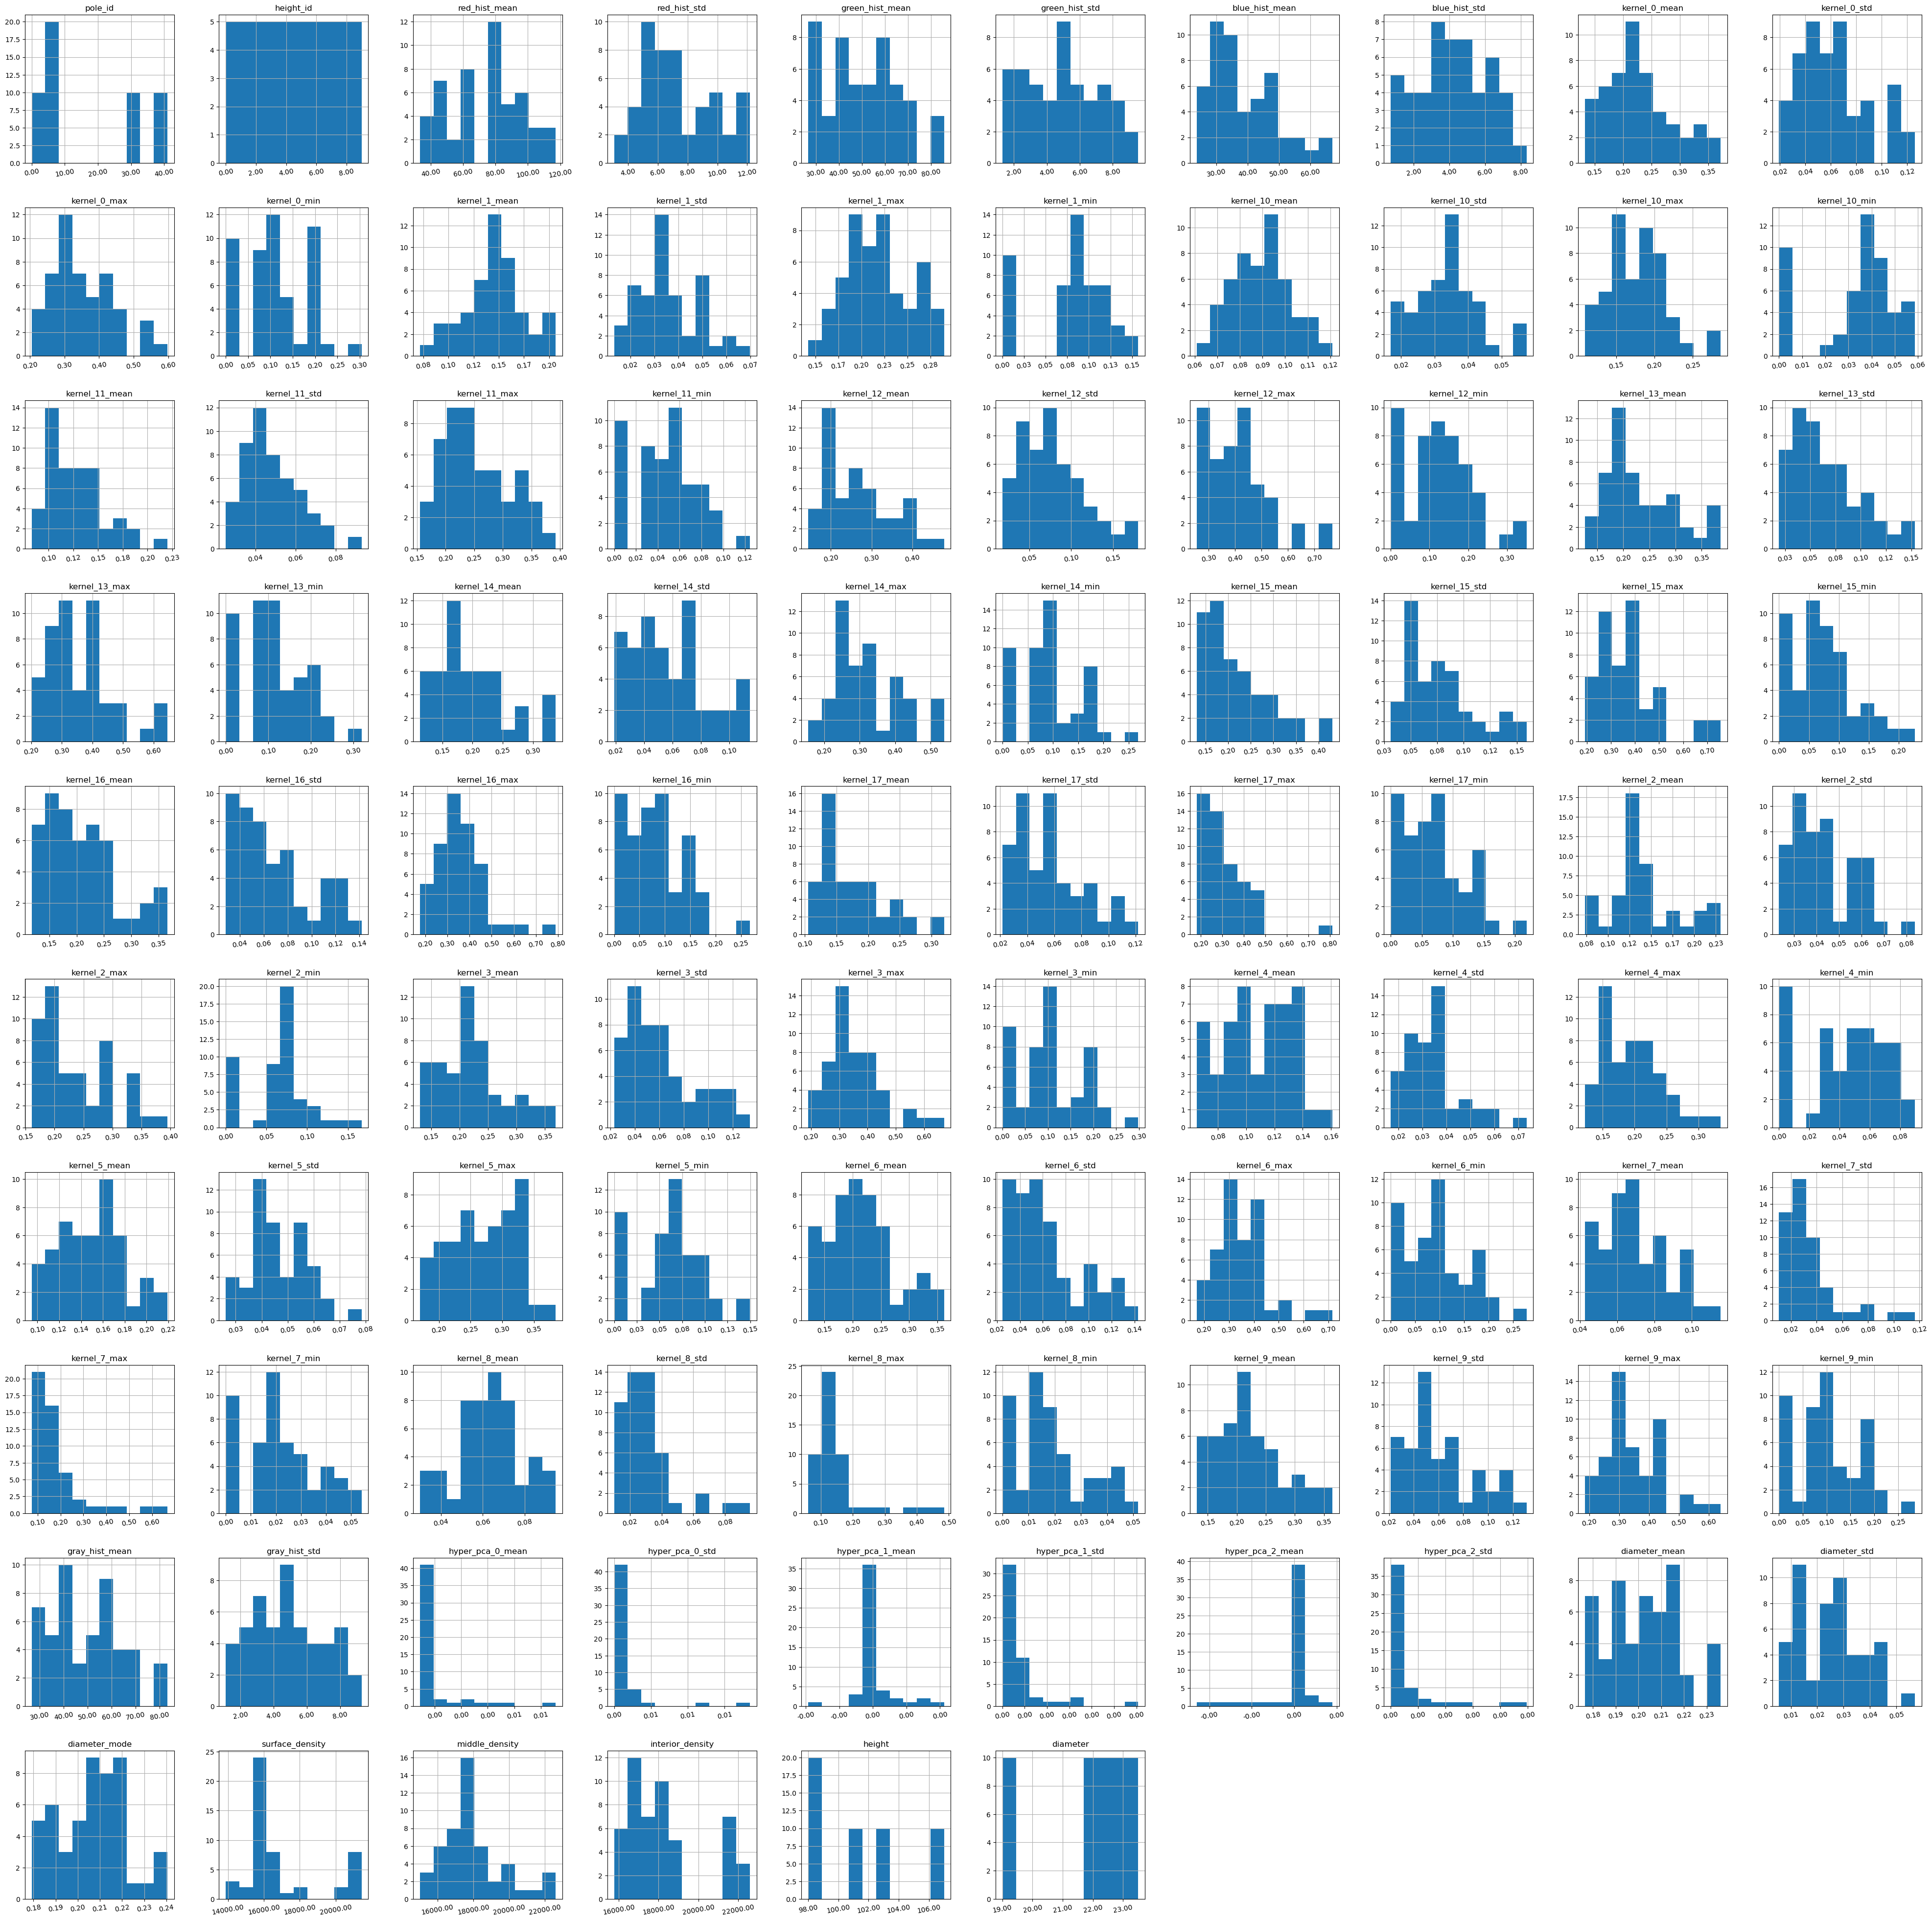

In [7]:
axes = full_df.hist(bins=10, figsize=(50,50), xrot=10);
for ax in axes.flat:
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

Judging by these figures, there don't seem to be any missing values codified as 0 or any other anomalous value, either. Some insights can be extracted from these histograms, though:

- Poles seem to be composed primarly of red colors, as the color mean histograms show. In addition, standard deviations tend to be small, usually less than 10, so the colors are relatively uniform.
- The range of activations for the Gabor kernels is usually small, but this range changes from kernel to kernel.
- The values for the PCA transformations also tend to be small, and unlike other features, these can have negative values.
- The estimated pole chunk diameters oscillate between 19cm and 30cm.
- The densities oscillate between 14000 and 22000. This value is unitless, as it was computed as the average of the X-ray readings in the respective chunks.
- All poles are around 1 meter high.

## Correlation with target variables

Now that the dataset has been verified to be free of outliers and missing values, the proper analysis can begin. This dataset has 5 target variables: `surface_density`, `middle_density`, `interior_density`, `height` and `diameter`. However, as of now there is no reason to measure the height, so only the other 4 variables will be analyzed.

Given that most scanners can only read information about the pole surface, it is expected that the strongest correlations will appear with the pole surface density variable and with the groundtruth diameter. 

### Pole surface

#### Color histogram attributes

<Axes: >

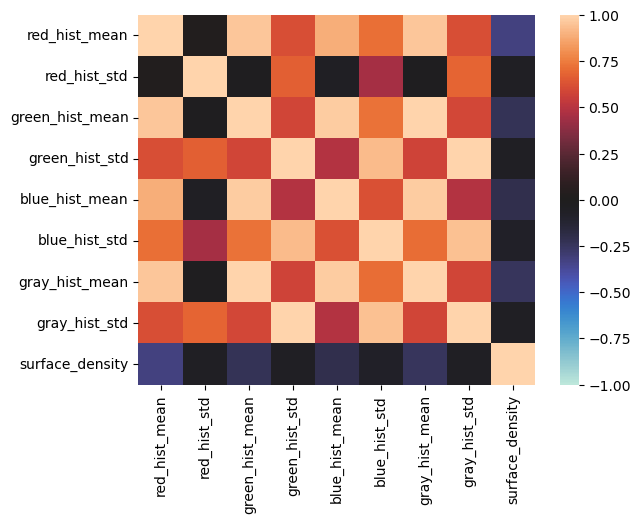

In [8]:
histogram_attributes = ['red', 'green', 'blue', 'gray']
histogram_pca_stats = ['mean', 'std']
kernels = list(range(17))
kernel_stats = ['mean', 'std', 'max', 'min']
pcas = list(range(2))

df_pole_surface_color = full_df[[f'{prod[0]}_hist_{prod[1]}' for prod in product(*[histogram_attributes, histogram_pca_stats])] + ['surface_density', 'pole_id']]
cmat = df_pole_surface_color.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap='icefire', vmin=-1, vmax=1)

In [9]:
cmat['surface_density'].sort_values()

red_hist_mean     -0.324088
gray_hist_mean    -0.242586
green_hist_mean   -0.231326
blue_hist_mean    -0.204312
blue_hist_std     -0.071563
red_hist_std      -0.053049
gray_hist_std     -0.050493
green_hist_std    -0.048964
surface_density    1.000000
Name: surface_density, dtype: float64

As it can be seen on these results, there seems to be a weak negative correlation between the color histogram means and the surface density, pointing at the intuition that "whiter" poles (those with less impregnation) tend to be in worse state. However, it is good to verify this with a pairplot.

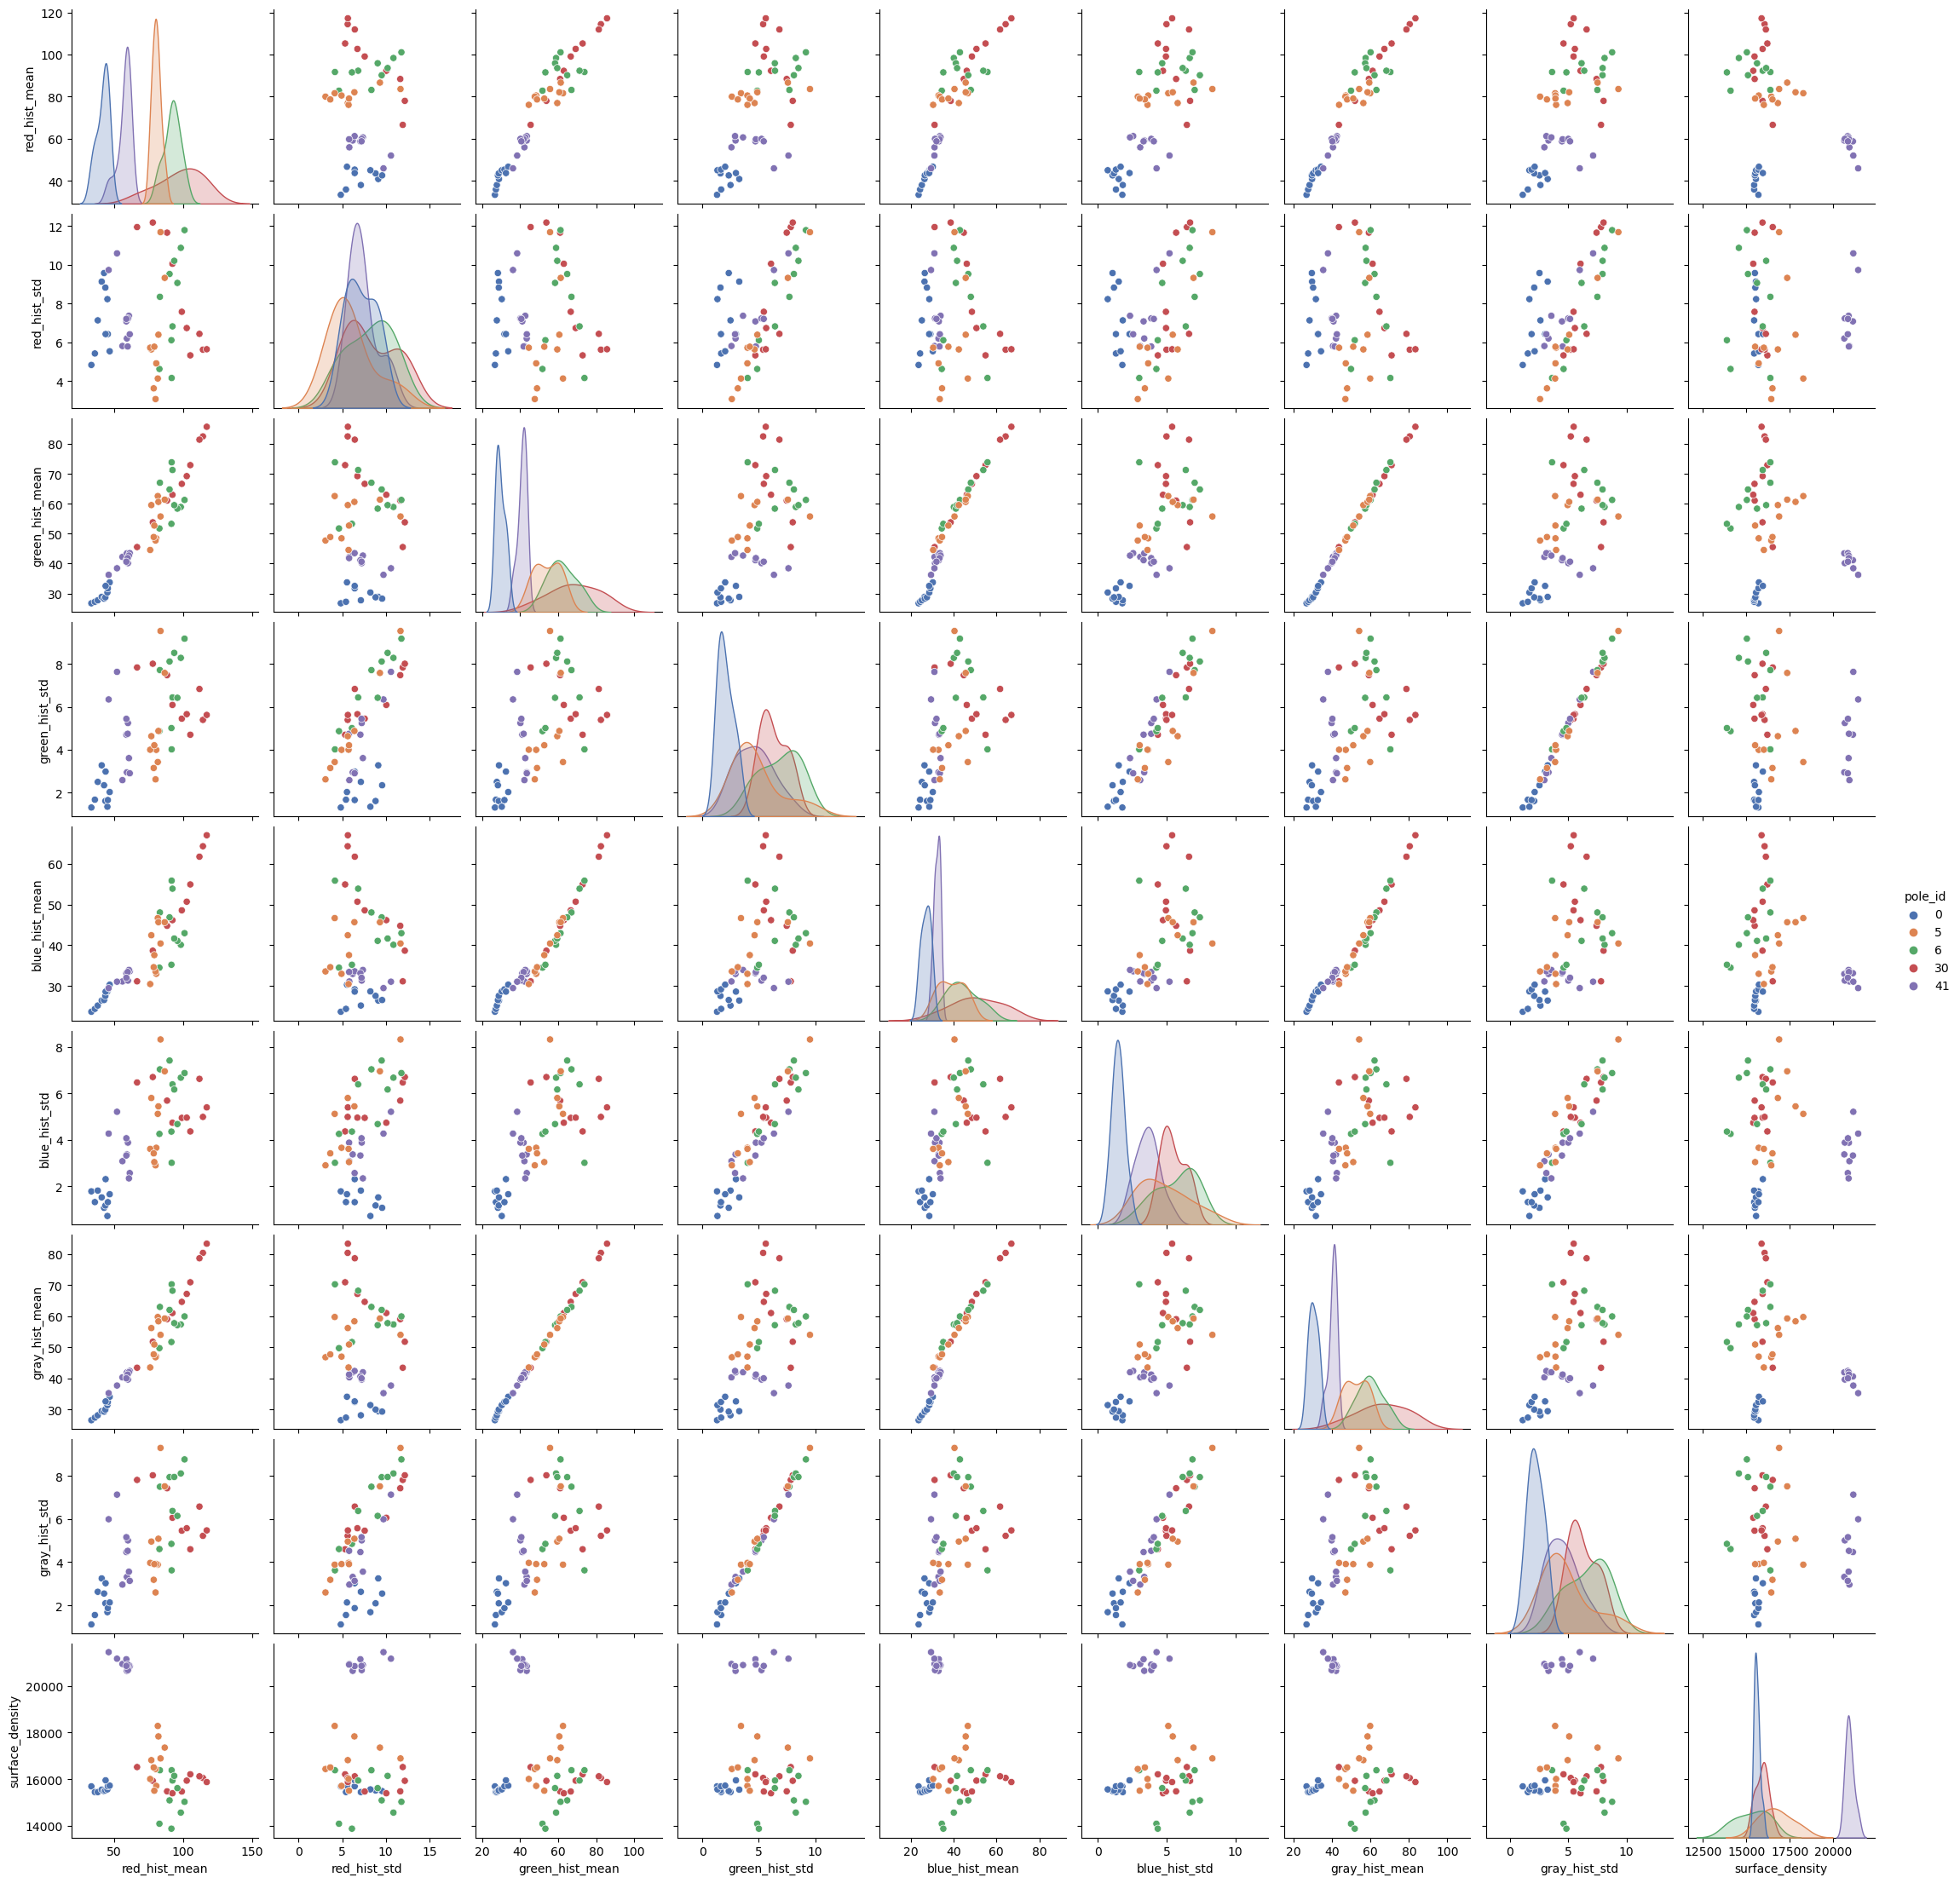

In [10]:
pg = sns.pairplot(df_pole_surface_color, diag_kind='kde', hue='pole_id', palette='deep')

As it can be seen in these results, there doesn't seem to be a great deal of correlation between the surface density and any of the color features. Perhaps, this negative correlation value was due to the anomalously high density of pole 41. The correlation coefficients can be recomputed after removing pole 41:

<Axes: >

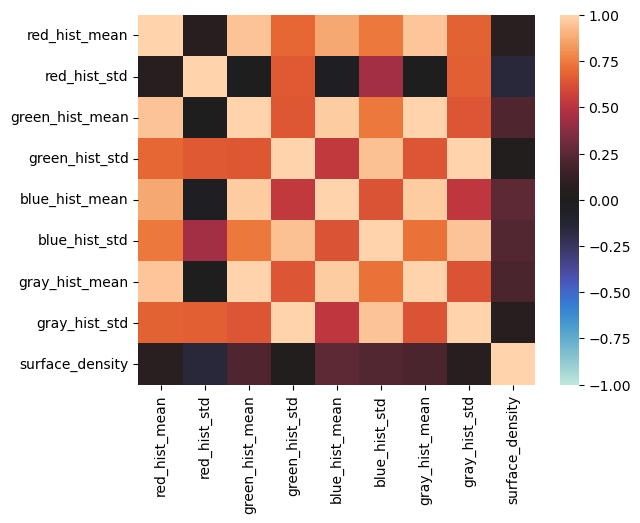

In [11]:
df_pole_surface_color_no_41 = df_pole_surface_color[df_pole_surface_color['pole_id'] != 41]
cmat = df_pole_surface_color_no_41.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap='icefire', vmin=-1, vmax=1)

In [12]:
cmat['surface_density'].sort_values()

red_hist_std      -0.155647
green_hist_std     0.027269
gray_hist_std      0.058840
red_hist_mean      0.066298
gray_hist_mean     0.200817
green_hist_mean    0.211819
blue_hist_std      0.223371
blue_hist_mean     0.252561
surface_density    1.000000
Name: surface_density, dtype: float64

As expected, the correlations have greatly fallen. Curiously enough, there is a very small correlation with the red histogram standard deviation and the blue histogram mean. 

#### Gabor filter attributes

<Axes: >

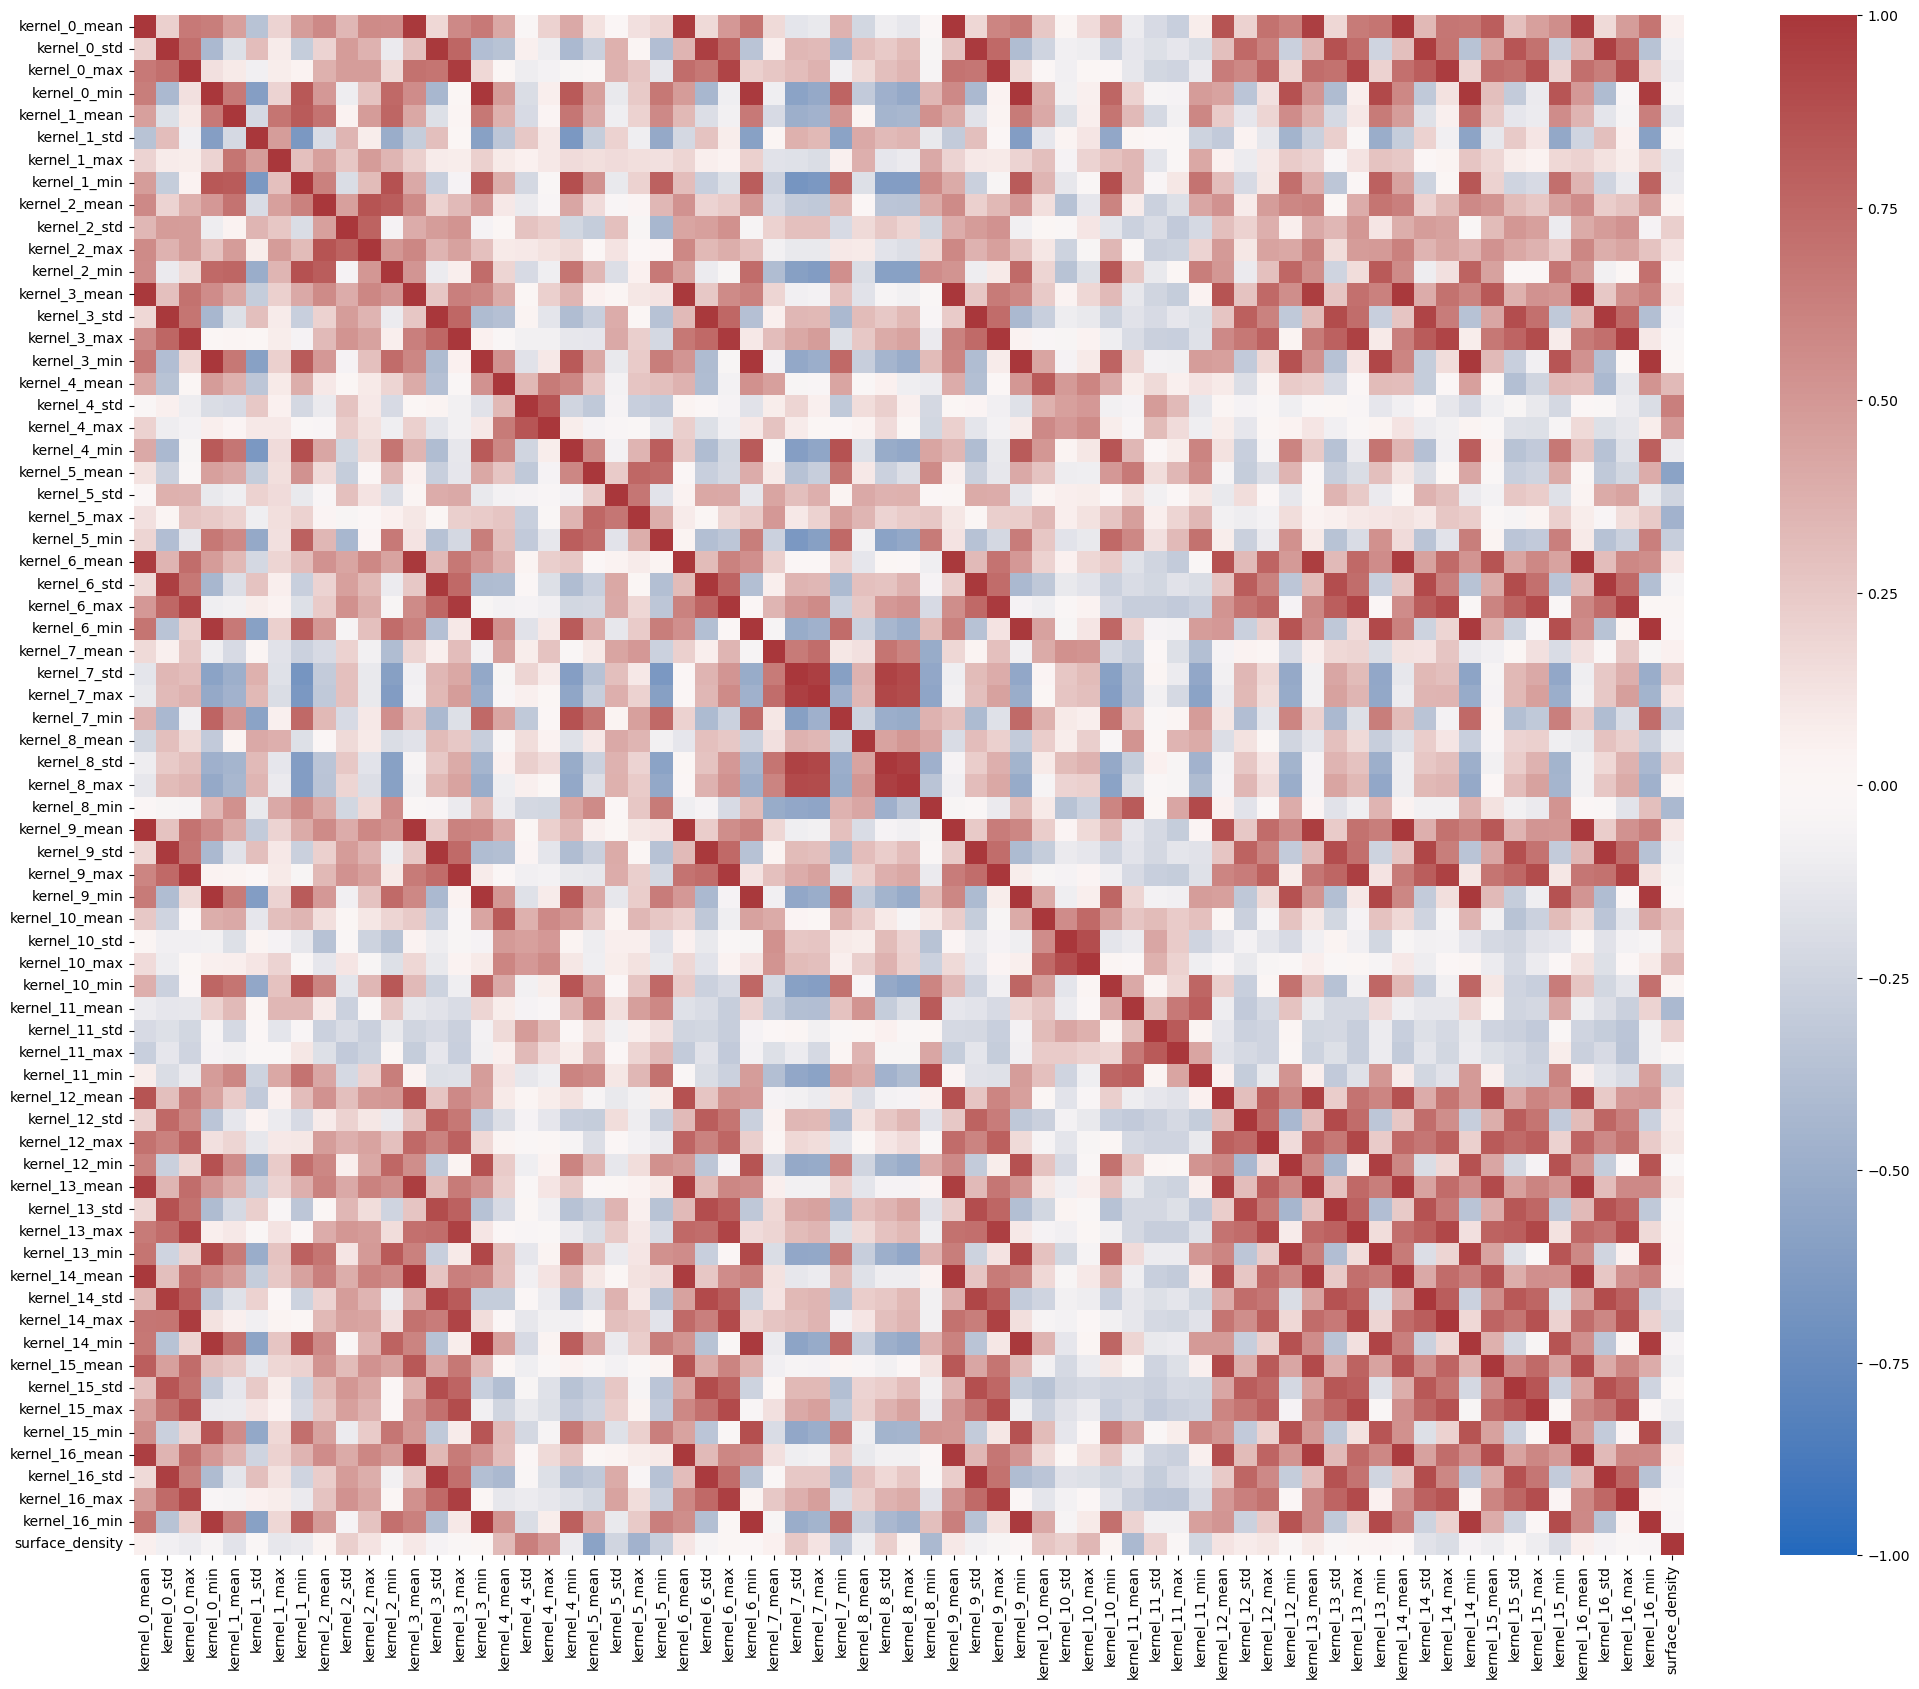

In [13]:
df_pole_surface_gabor = full_df[[f'kernel_{prod[0]}_{prod[1]}' for prod in product(*[kernels, kernel_stats])] + ['surface_density', 'pole_id']]
cmat = df_pole_surface_gabor.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
fix, ax = plt.subplots(figsize=(25,20))
sns.heatmap(cmat, cmap='vlag', vmin=-1, vmax=1, ax=ax)

In [14]:
cmat['surface_density'].sort_values()

kernel_5_mean     -0.572110
kernel_5_max      -0.467172
kernel_11_mean    -0.419642
kernel_8_min      -0.418997
kernel_7_min      -0.305769
                     ...   
kernel_4_mean      0.322624
kernel_10_max      0.340418
kernel_4_max       0.494052
kernel_4_std       0.626202
surface_density    1.000000
Name: surface_density, Length: 69, dtype: float64

For the Gabor filters, there seems to be some stronger correlations: kernel 5's mean and max have a strong negative correlation with density, and the standard deviation of kernel 4 seems to have a positive correlation. It might be interesting to see these variables together with the surface density on a pairplot.

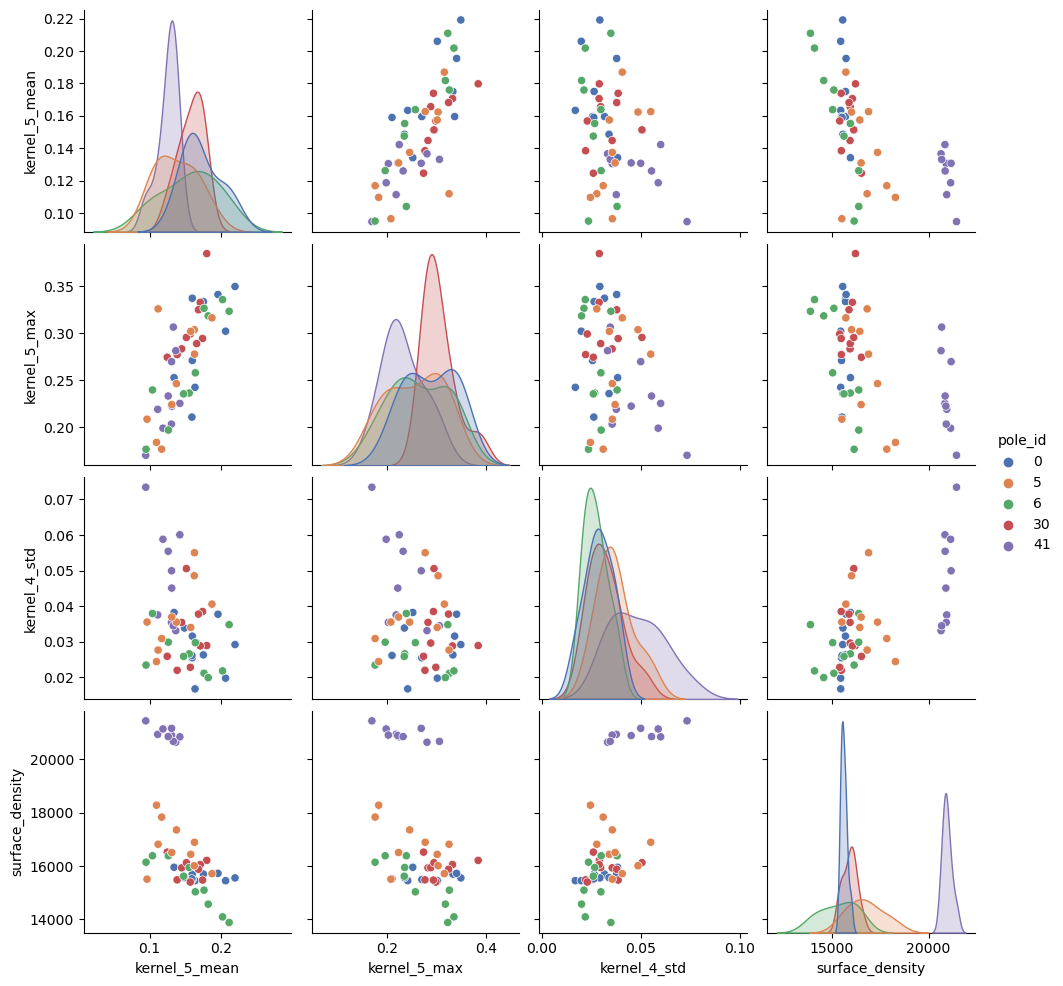

In [15]:
gabor_corr_columns = ['kernel_5_mean', 'kernel_5_max', 'kernel_4_std', 'surface_density']
pg = sns.pairplot(df_pole_surface_gabor, vars=gabor_corr_columns, diag_kind='kde', hue='pole_id', palette='deep')

Again, these correlations seem to be influenced by the anomalously high density of pole 41. It is a good idea to do the same as before

<Axes: >

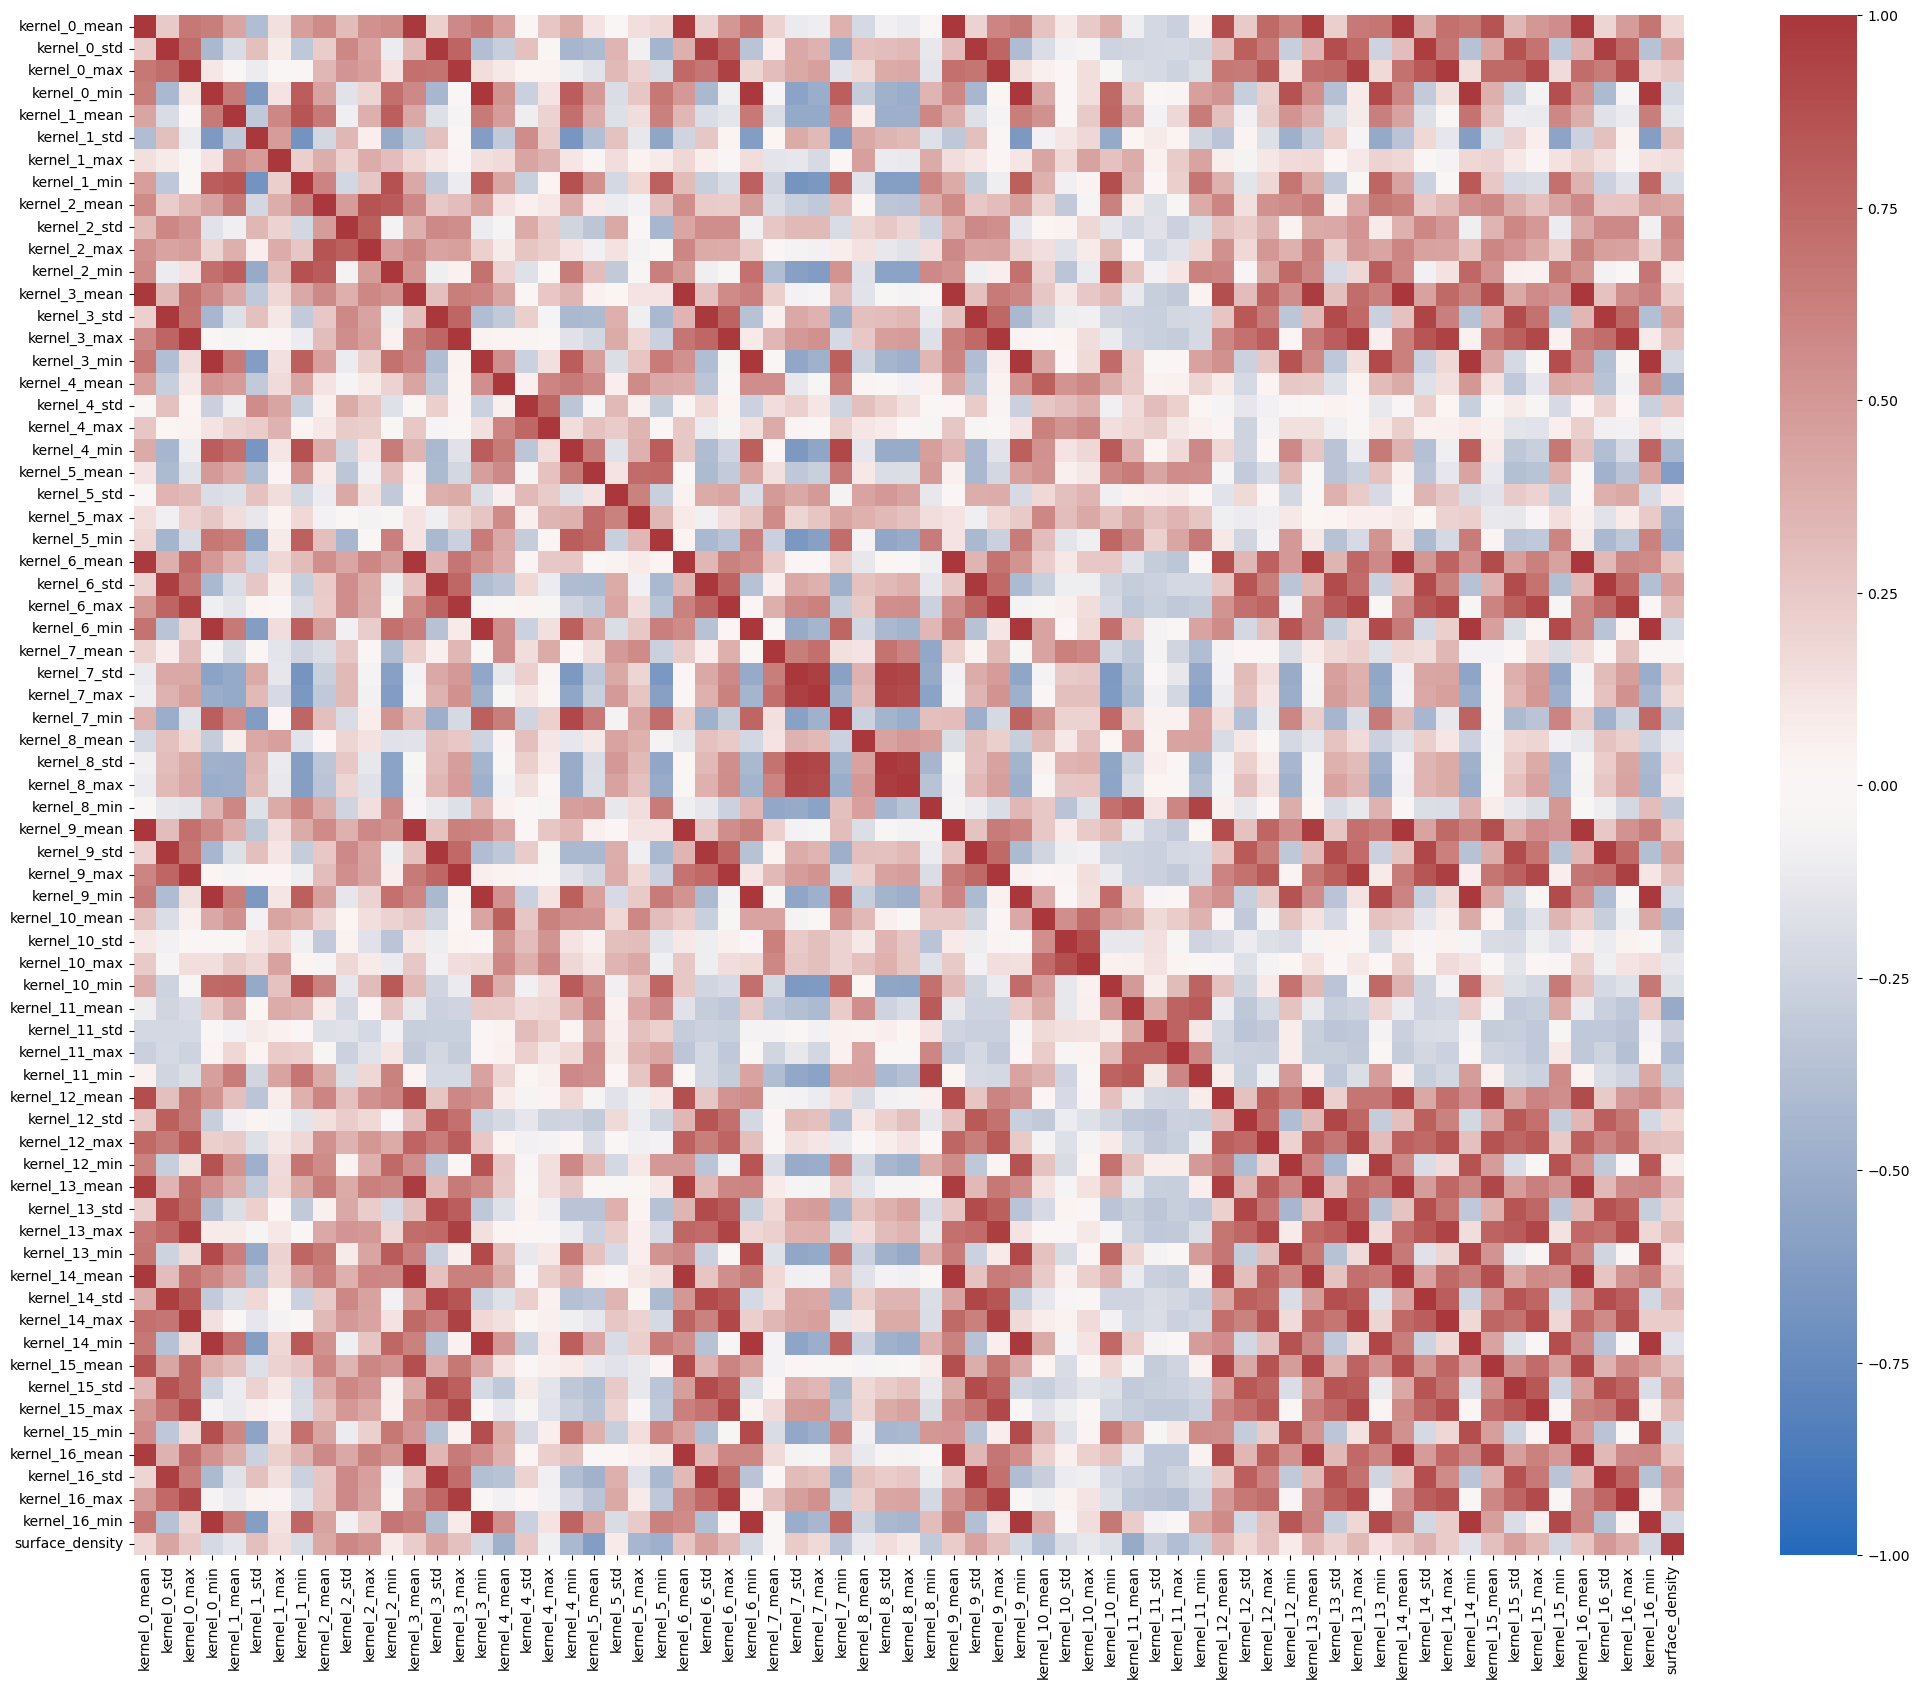

In [16]:
df_pole_surface_gabor_no_41 = df_pole_surface_gabor[df_pole_surface_gabor['pole_id'] != 41]
cmat = df_pole_surface_gabor_no_41.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
fix, ax = plt.subplots(figsize=(25,20))
sns.heatmap(cmat, cmap='vlag', vmin=-1, vmax=1, ax=ax)

In [17]:
cmat['surface_density'].sort_values()

kernel_5_mean     -0.615601
kernel_11_mean    -0.517884
kernel_5_min      -0.481292
kernel_4_mean     -0.475128
kernel_5_max      -0.437052
                     ...   
kernel_6_std       0.458342
kernel_16_std      0.493497
kernel_2_max       0.537438
kernel_2_std       0.579092
surface_density    1.000000
Name: surface_density, Length: 69, dtype: float64

In this case, it is actually the mean of kernel 5 and the standard deviation of kernel 2 the ones with the highest correlations. Therefore, visualizing these is a good idea,

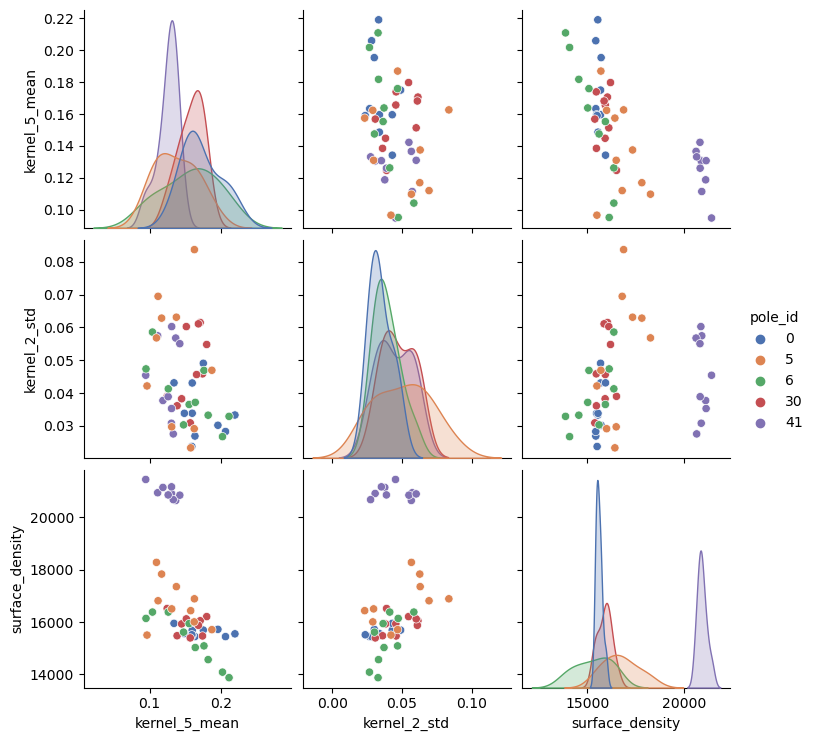

In [18]:
gabor_corr_columns = ['kernel_5_mean', 'kernel_2_std', 'surface_density']
pg = sns.pairplot(df_pole_surface_gabor, vars=gabor_corr_columns, diag_kind='kde', hue='pole_id', palette='deep')

As it can be seen, the correlation is somewhat weak, as for both kernels, the points of the scatterplot form almost a straight line. Still, it is a good idea to visualize this correlation with a joint plot:

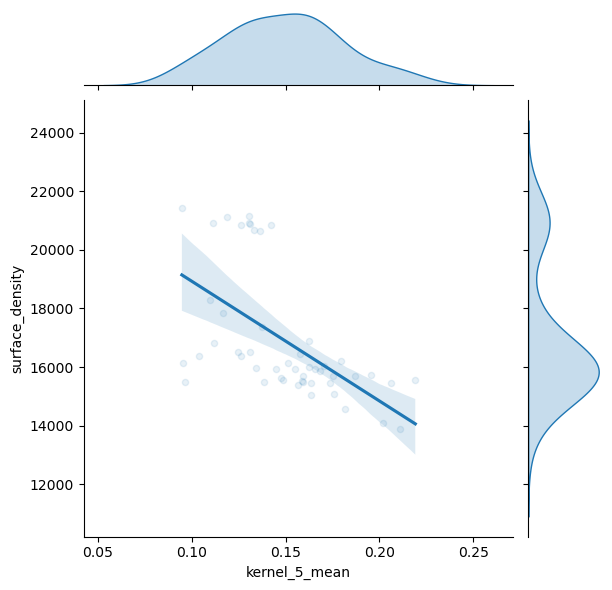

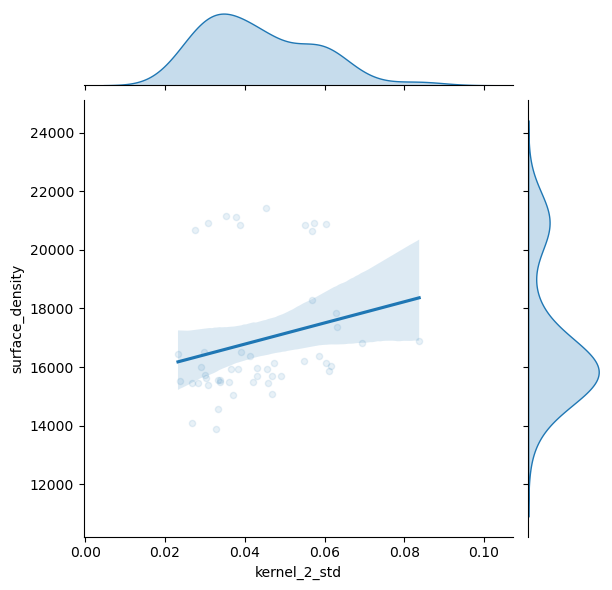

In [19]:
jg = sns.JointGrid(data=df_pole_surface_gabor, x='kernel_5_mean', y='surface_density')
jg.plot_joint(sns.regplot, scatter_kws={'alpha':0.1, 's':20})
jg.plot_marginals(sns.kdeplot, fill=True)

jg = sns.JointGrid(data=df_pole_surface_gabor, x='kernel_2_std', y='surface_density')
jg.plot_joint(sns.regplot, scatter_kws={'alpha':0.1, 's':20})
jg.plot_marginals(sns.kdeplot, fill=True)

In both cases, it can be seen that the correlation is weak, and most likely influenced by the values for pole 41, seen above.

#### Hyperspectral attributes

Since there are very few hyperspectral attributes for each chunk, in this case it is possible to visualize everything at once.

<Axes: >

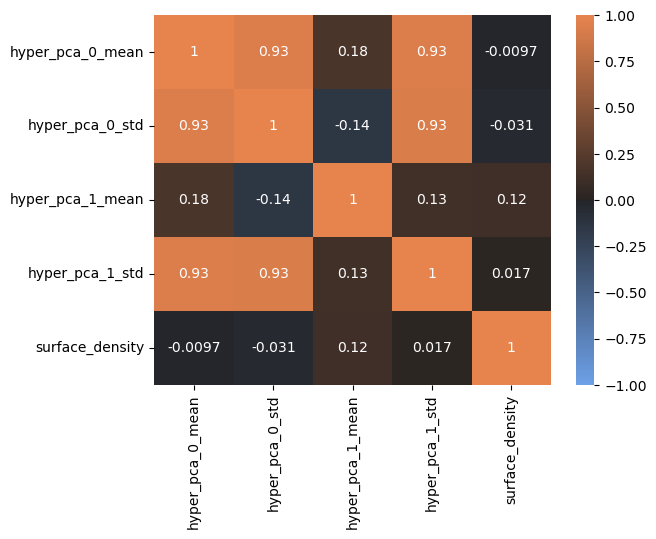

In [20]:
df_pole_surface_hyper = full_df[[f'hyper_pca_{prod[0]}_{prod[1]}' for prod in product(*[pcas, histogram_pca_stats])] + ['surface_density', 'pole_id']]
cmat = df_pole_surface_hyper.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True), vmin=-1, vmax=1, annot=True)

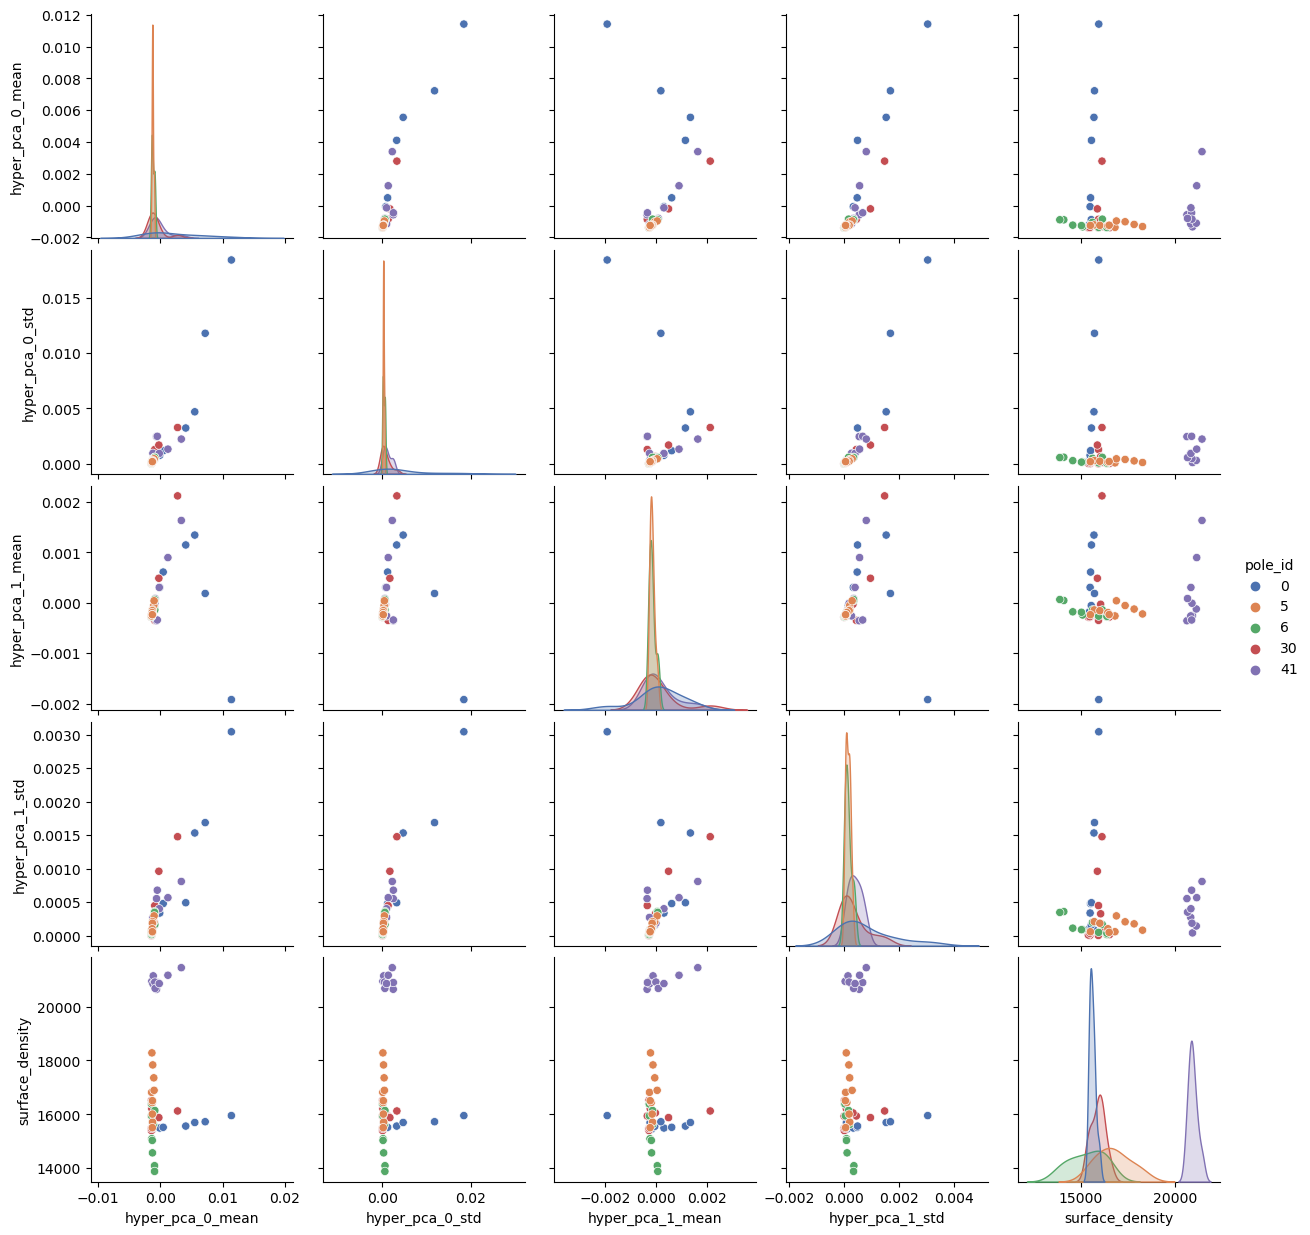

In [21]:
pg = sns.pairplot(df_pole_surface_hyper, diag_kind='kde', hue='pole_id', palette='deep')

Unfortunately, there seem to be no correlations with any of the PCA variables.

#### LiDAR attributes

The last attributes in the dataset are the LiDAR attributes. These contain information about the diameter estimates (mean, stdev and mode of the estimates).

<Axes: >

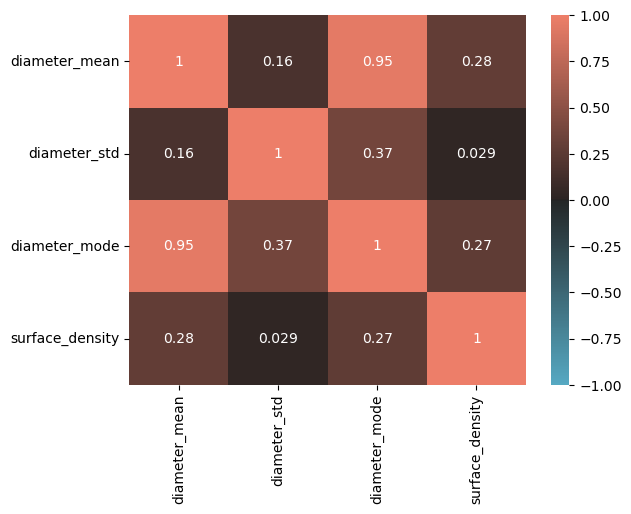

In [22]:
df_pole_surface_lidar = full_df[[f'diameter_{ft}' for ft in ['mean', 'std', 'mode']] + ['surface_density', 'pole_id']]
cmat = df_pole_surface_lidar.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap=sns.diverging_palette(220, 20, l=65, center="dark", as_cmap=True), vmin=-1, vmax=1, annot=True)

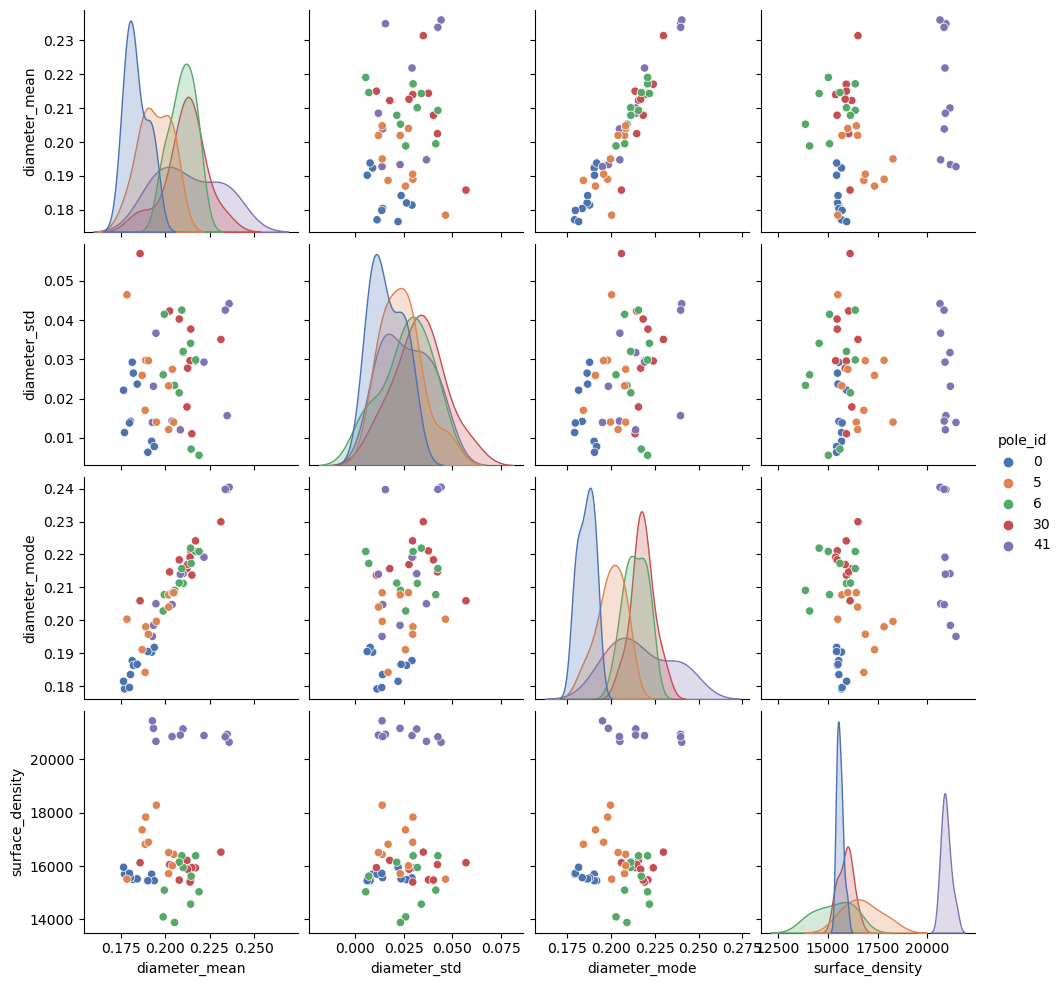

In [23]:
pg = sns.pairplot(df_pole_surface_lidar, diag_kind='kde', hue='pole_id', palette='deep')

In this case, even if the correlations are slightly strong, these are still not strong enough to say that any of these features is correlated with the surface density values.

#### Conclusion

This analysis has shown that there seem to be no strong correlations of each individual variable with the pole surface density. These correlations, even if they seem slightly strong in some cases, are greatly influenced by the high readings for pole 41, as it has much more density than the other poles. However, some Gabor kernel activations and the diameter estimates seem to have a slightly higher correlation with the pole surface

### Pole middle

Now that the analysis of the correlation of all the variables with the pole surface density has been completed, it is time to analyse the correlations with the middle of the pole. Intuitively, these correlations will not be extremely strong, as this is an area that most of the current scanners (photos, hyperspectral and LiDAR) cannot read directly.

#### Color histogram attributes

<Axes: >

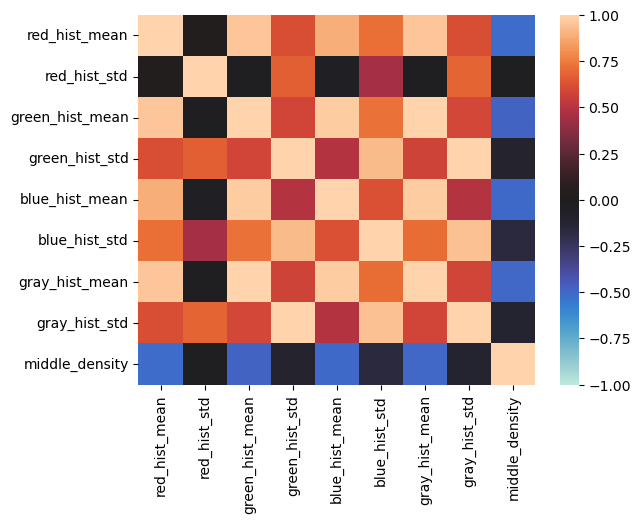

In [24]:
df_pole_middle_color = full_df[[f'{prod[0]}_hist_{prod[1]}' for prod in product(*[histogram_attributes, histogram_pca_stats])] + ['middle_density', 'pole_id']]
cmat = df_pole_middle_color.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap='icefire', vmin=-1, vmax=1)

Curiously enough, the negative correlations that were already seen for the pole surface seem to be stronger for the middle of the pole. However, this can also be caused by the high density of pole 41, so it is a goo idea to visualize these correlations.

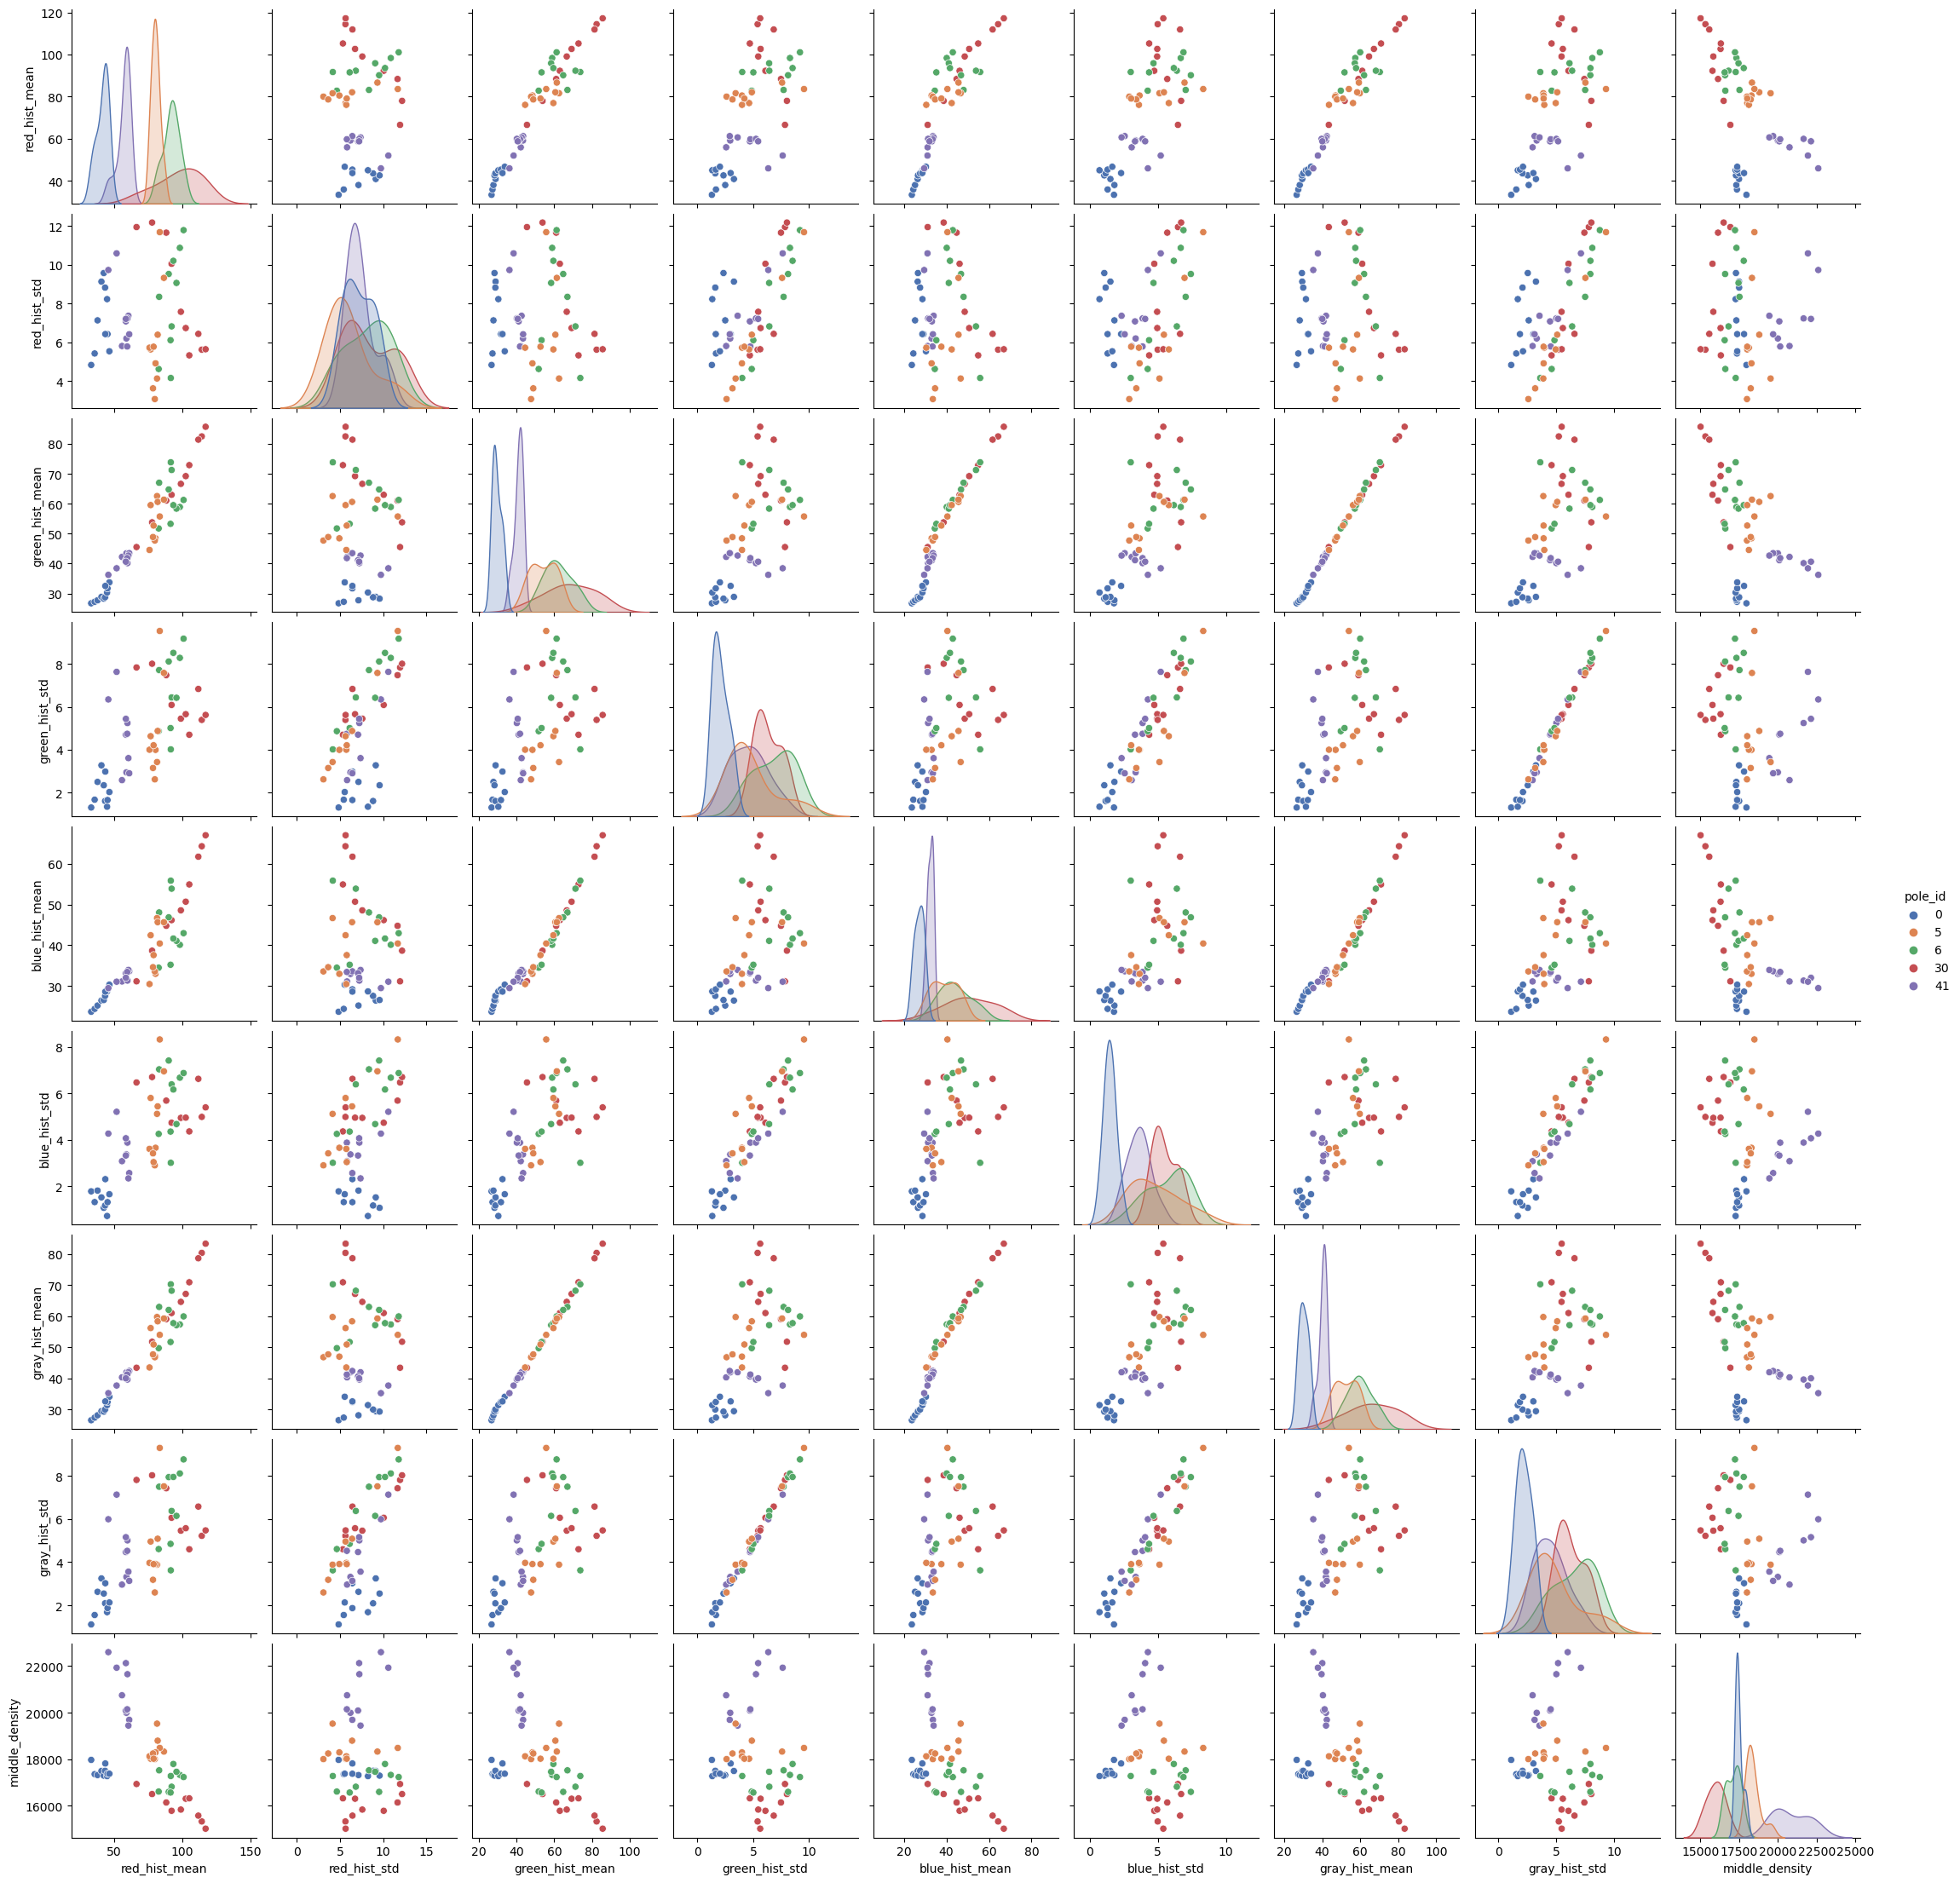

In [25]:
pg = sns.pairplot(df_pole_middle_color, diag_kind='kde', hue='pole_id', palette='deep')

Apparently, for the pole middle density, the correlations seem to be much clearer. Curiously enough, in this case, it seems that the new pole is the outlier, since it has a relatively small density for a new pole.

#### Gabor filter attributes

<Axes: >

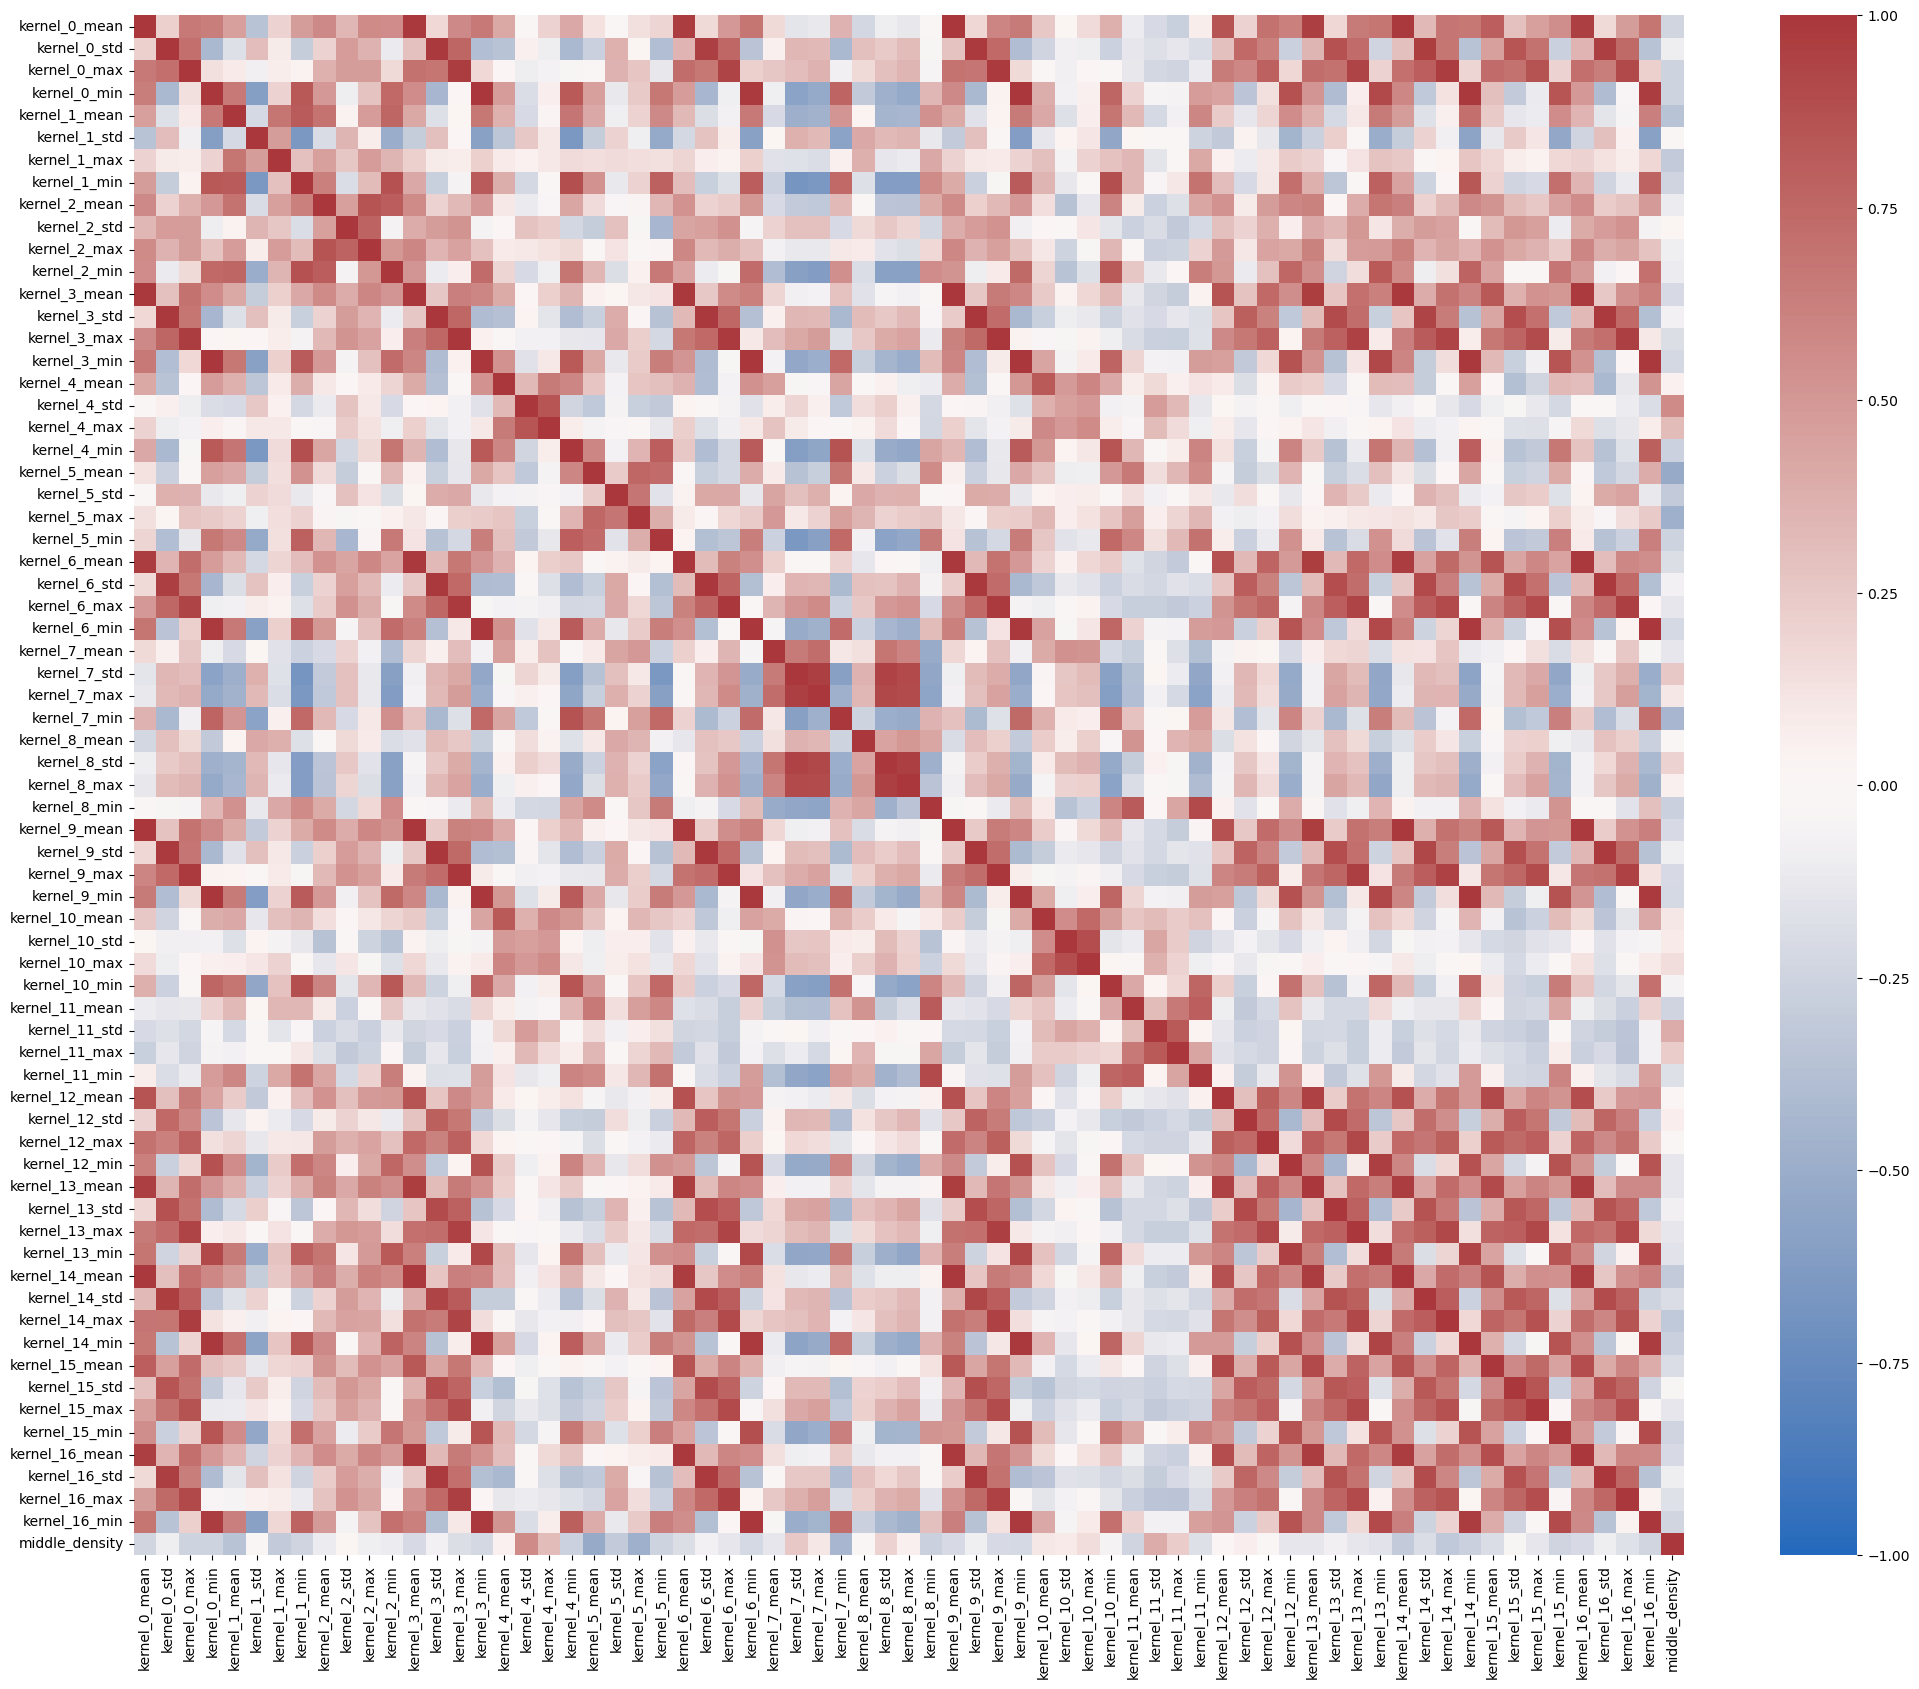

In [26]:
df_pole_middle_gabor = full_df[[f'kernel_{prod[0]}_{prod[1]}' for prod in product(*[kernels, kernel_stats])] + ['middle_density', 'pole_id']]
cmat = df_pole_middle_gabor.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
fix, ax = plt.subplots(figsize=(25,20))
sns.heatmap(cmat, cmap='vlag', vmin=-1, vmax=1, ax=ax)

In [27]:
cmat['middle_density'].sort_values()

kernel_5_mean    -0.518250
kernel_5_max     -0.479992
kernel_7_min     -0.435824
kernel_1_mean    -0.357463
kernel_14_max    -0.315733
                    ...   
kernel_7_std      0.252885
kernel_4_max      0.316267
kernel_11_std     0.394520
kernel_4_std      0.565988
middle_density    1.000000
Name: middle_density, Length: 69, dtype: float64

For the pole middle density, it seems that the standard deviation of kernel 4 and the mean of kernel 5 have the largest correlations with the middle density. As before, it is a good idea to visualize these

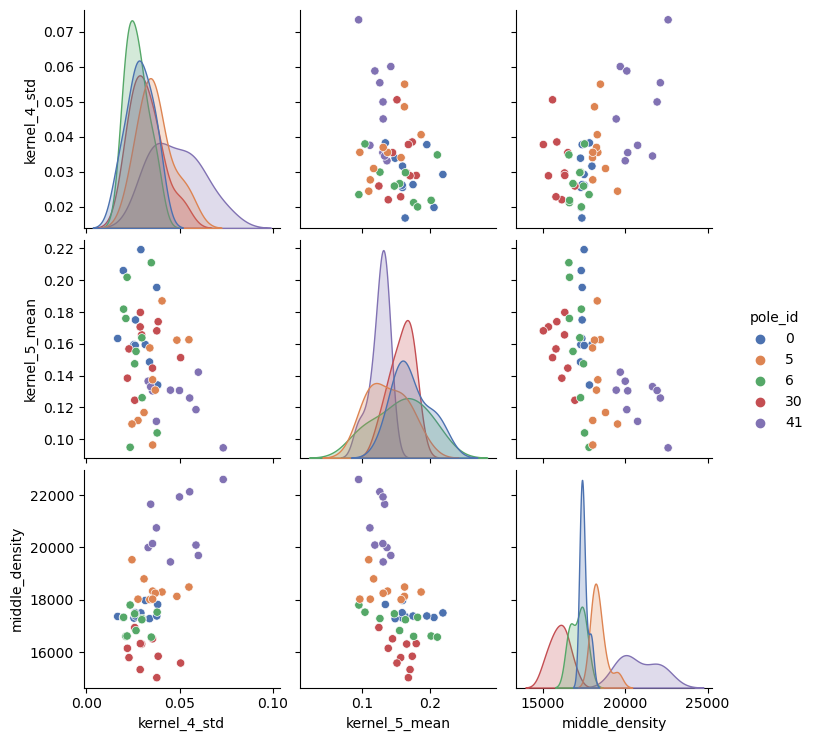

In [28]:
gabor_corr_columns = ['kernel_4_std', 'kernel_5_mean', 'middle_density']
pg = sns.pairplot(df_pole_middle_gabor, vars=gabor_corr_columns, diag_kind='kde', hue='pole_id', palette='deep')

As with the color histogram features, something similar can be here: the correlations with the middle density seem to be clearer. Specially, the correlation of the standard deviation of kernel 4 with the middle density seems to be particularly strong, as a straight line can be intuited from the scatter plot. It is a good idea to visualize this with a jointplot.

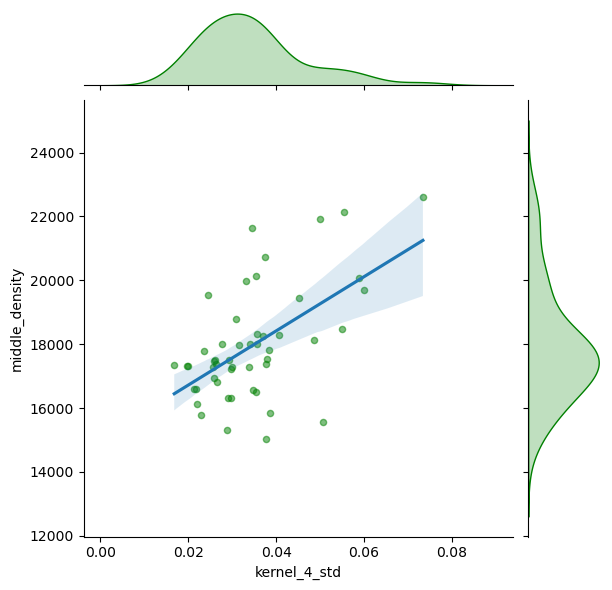

In [29]:
jg = sns.JointGrid(data=df_pole_middle_gabor, x='kernel_4_std', y='middle_density')
jg.plot_joint(sns.regplot, scatter_kws={'alpha':0.5, 's':20, 'color': 'green'})
jg.plot_marginals(sns.kdeplot, fill=True, color='green')

Even if the correlation is weak, it doesn't seem to be influenced by extreme values, and it has somewhat stable variance. This variable is therefore interesting for future analysis.

#### Hyperspectral attributes

<Axes: >

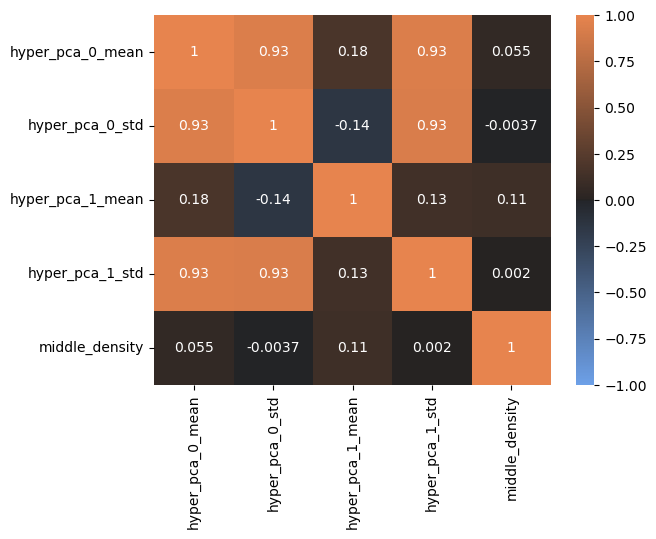

In [30]:
df_pole_middle_hyper = full_df[[f'hyper_pca_{prod[0]}_{prod[1]}' for prod in product(*[pcas, histogram_pca_stats])] + ['middle_density', 'pole_id']]
cmat = df_pole_middle_hyper.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True), vmin=-1, vmax=1, annot=True)

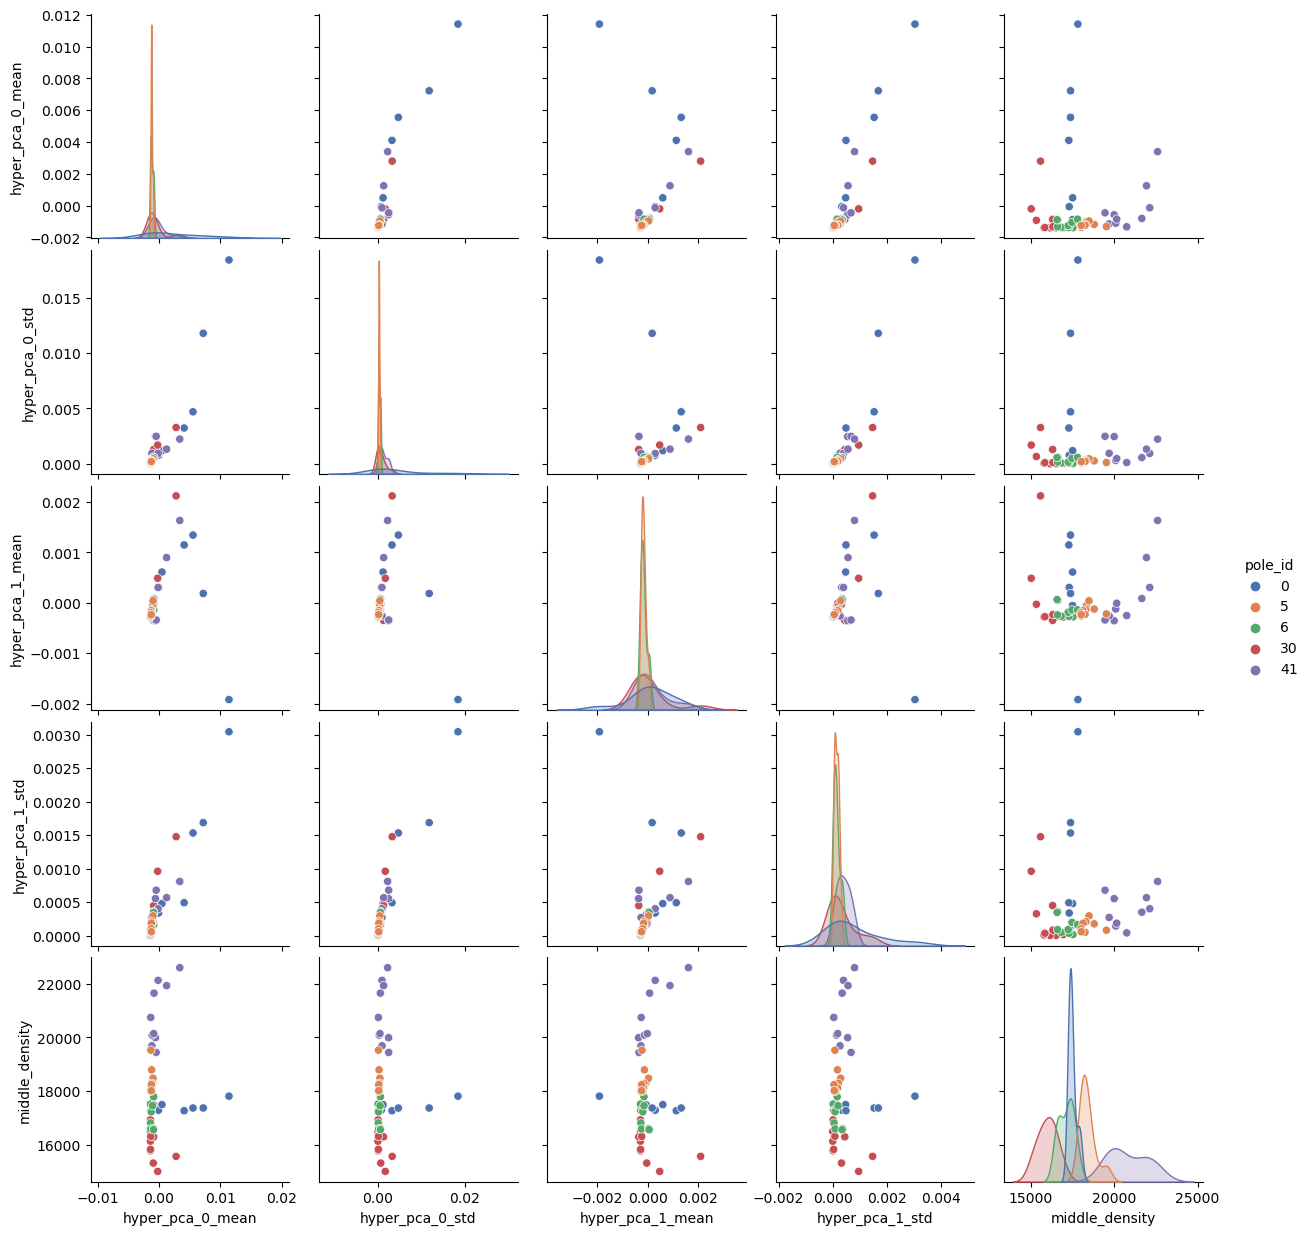

In [31]:
pg = sns.pairplot(df_pole_middle_hyper, diag_kind='kde', hue='pole_id', palette='deep')

As with the pole surface, the hyperspectral PCA data seems to give no useful insights at all.

#### LiDAR attributes

<Axes: >

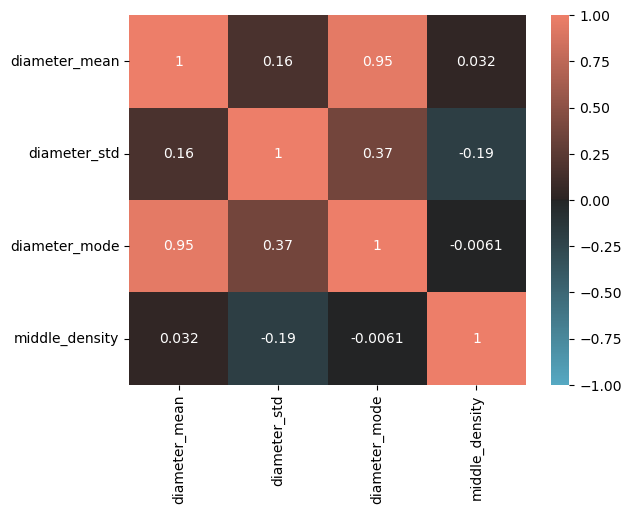

In [32]:
df_pole_middle_lidar = full_df[[f'diameter_{ft}' for ft in ['mean', 'std', 'mode']] + ['middle_density', 'pole_id']]
cmat = df_pole_middle_lidar.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap=sns.diverging_palette(220, 20, l=65, center="dark", as_cmap=True), vmin=-1, vmax=1, annot=True)

As it can be seen, even if the radius is highly correlated with the surface density of the pole (which intuitively makes sense), it is not that much correlated with the middle density of the pole.

#### Conclusion

This part of the analysis has provided additional insight into how different readings correlate with different parts of the pole. Curiously enough, the color histogram and some Gabor kernel features seem to have a clearer correlation with the density of the pole middle, rather than the pole surface. A possible explanation is that internal rot tends to be more severe than external rots or cracks in the sense that it "eats" a larger portion of the pole, thus lowering the density more than on external damage. In addition, if the outside of the pole is in worse state (more cracks and less impregnation), this could correlate with the pole being older, and the older it is, the larger the chances that it has internal rot.

### Pole interior

Finally, as it was done with the pole exterior and middle sections, it is a good idea to run this same analysis on the interior of the pole.

#### Color histogram attributes

<Axes: >

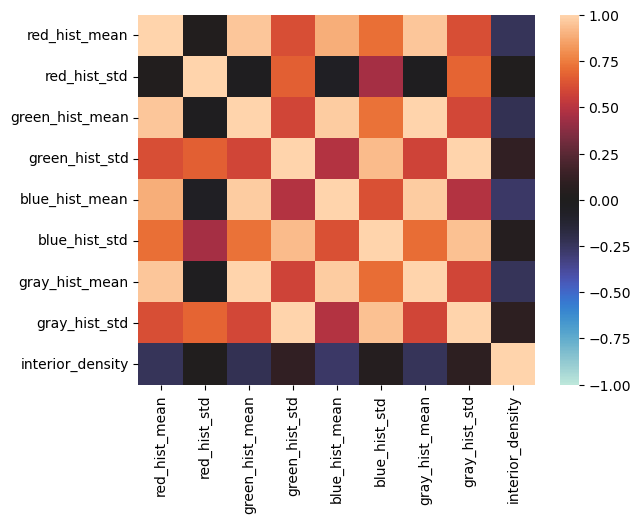

In [33]:
df_pole_interior_color = full_df[[f'{prod[0]}_hist_{prod[1]}' for prod in product(*[histogram_attributes, histogram_pca_stats])] + ['interior_density', 'pole_id']]
cmat = df_pole_interior_color.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap='icefire', vmin=-1, vmax=1)

For the pole interior, the correlations do not seem to be as strong as with the middle of the pole. It would be interesting to study the possible causes of this phenomenon by looking at the pairplot

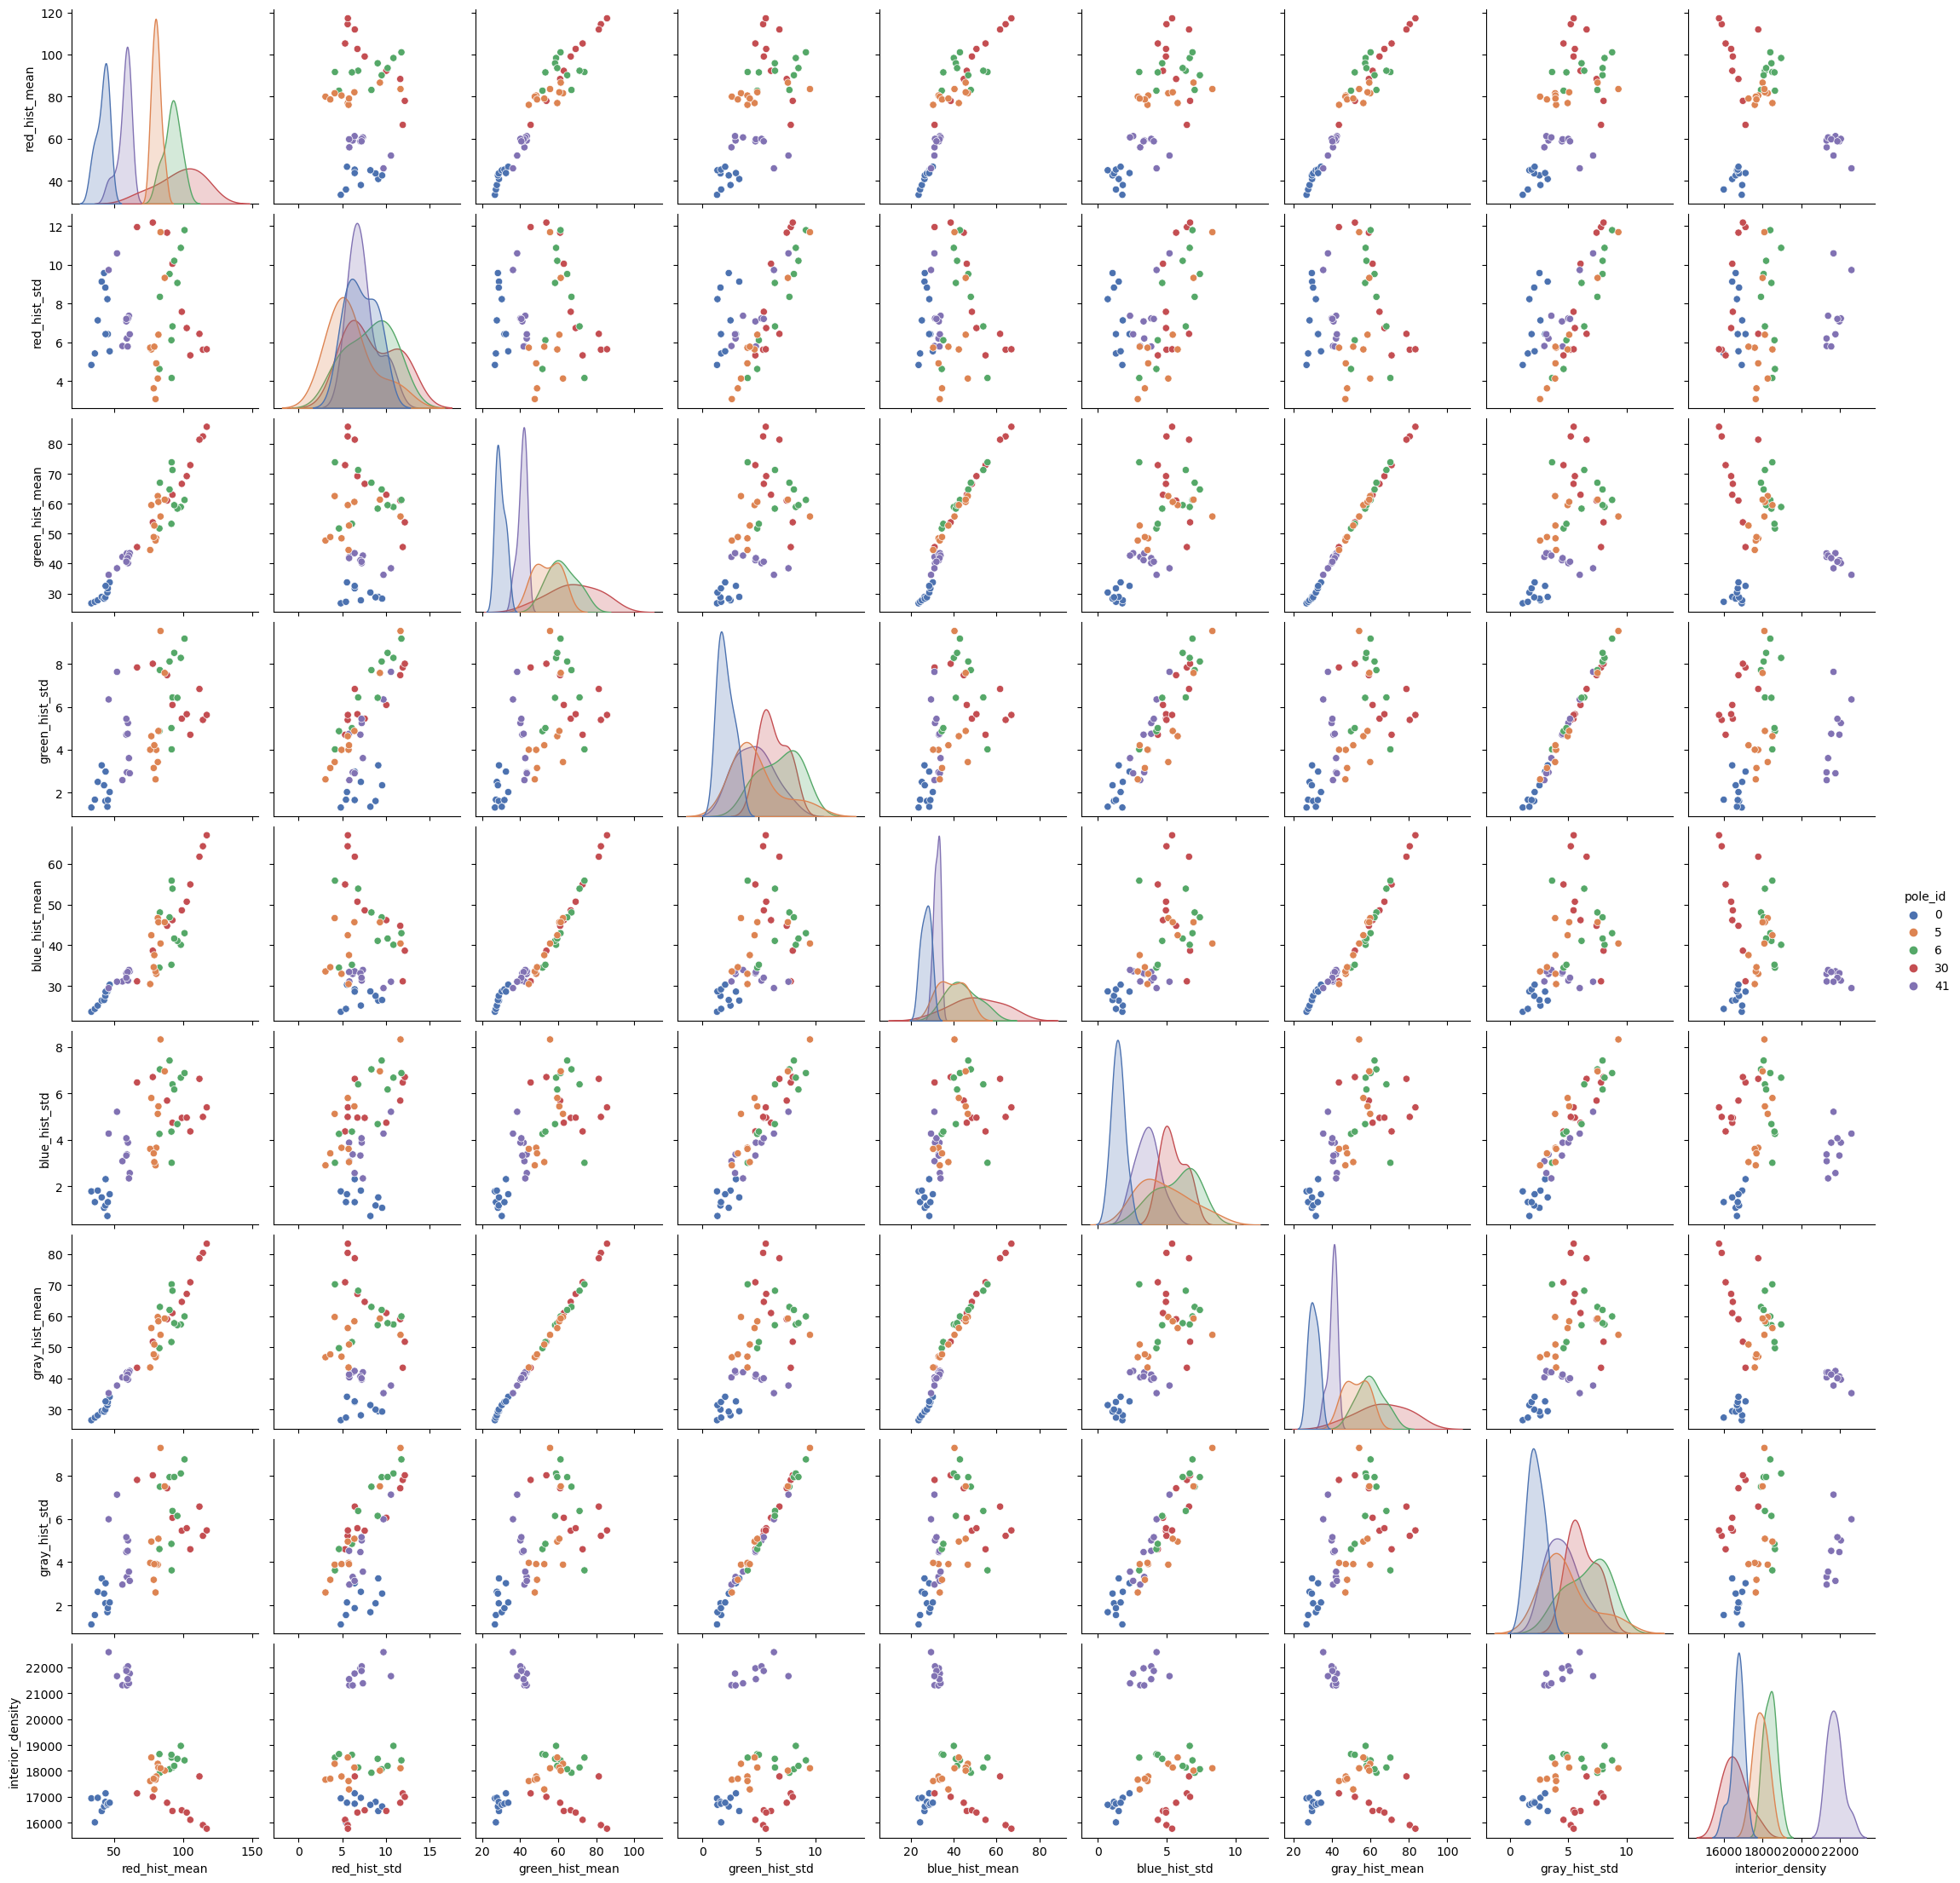

In [34]:
pg = sns.pairplot(df_pole_interior_color, diag_kind='kde', hue='pole_id', palette='deep')

Regarding the color histogram means, it seems that both poles 0 and 41 appear as outliers in this case. Pole 0 has small color means and density, pole 41 has slightly bigger means and much more density, and the rest tend to have small densities and somewhat spread histogram mean values. Apparently, the correlations do not seem as strong as with the middle of the pole.

#### Gabor filter attributes

<Axes: >

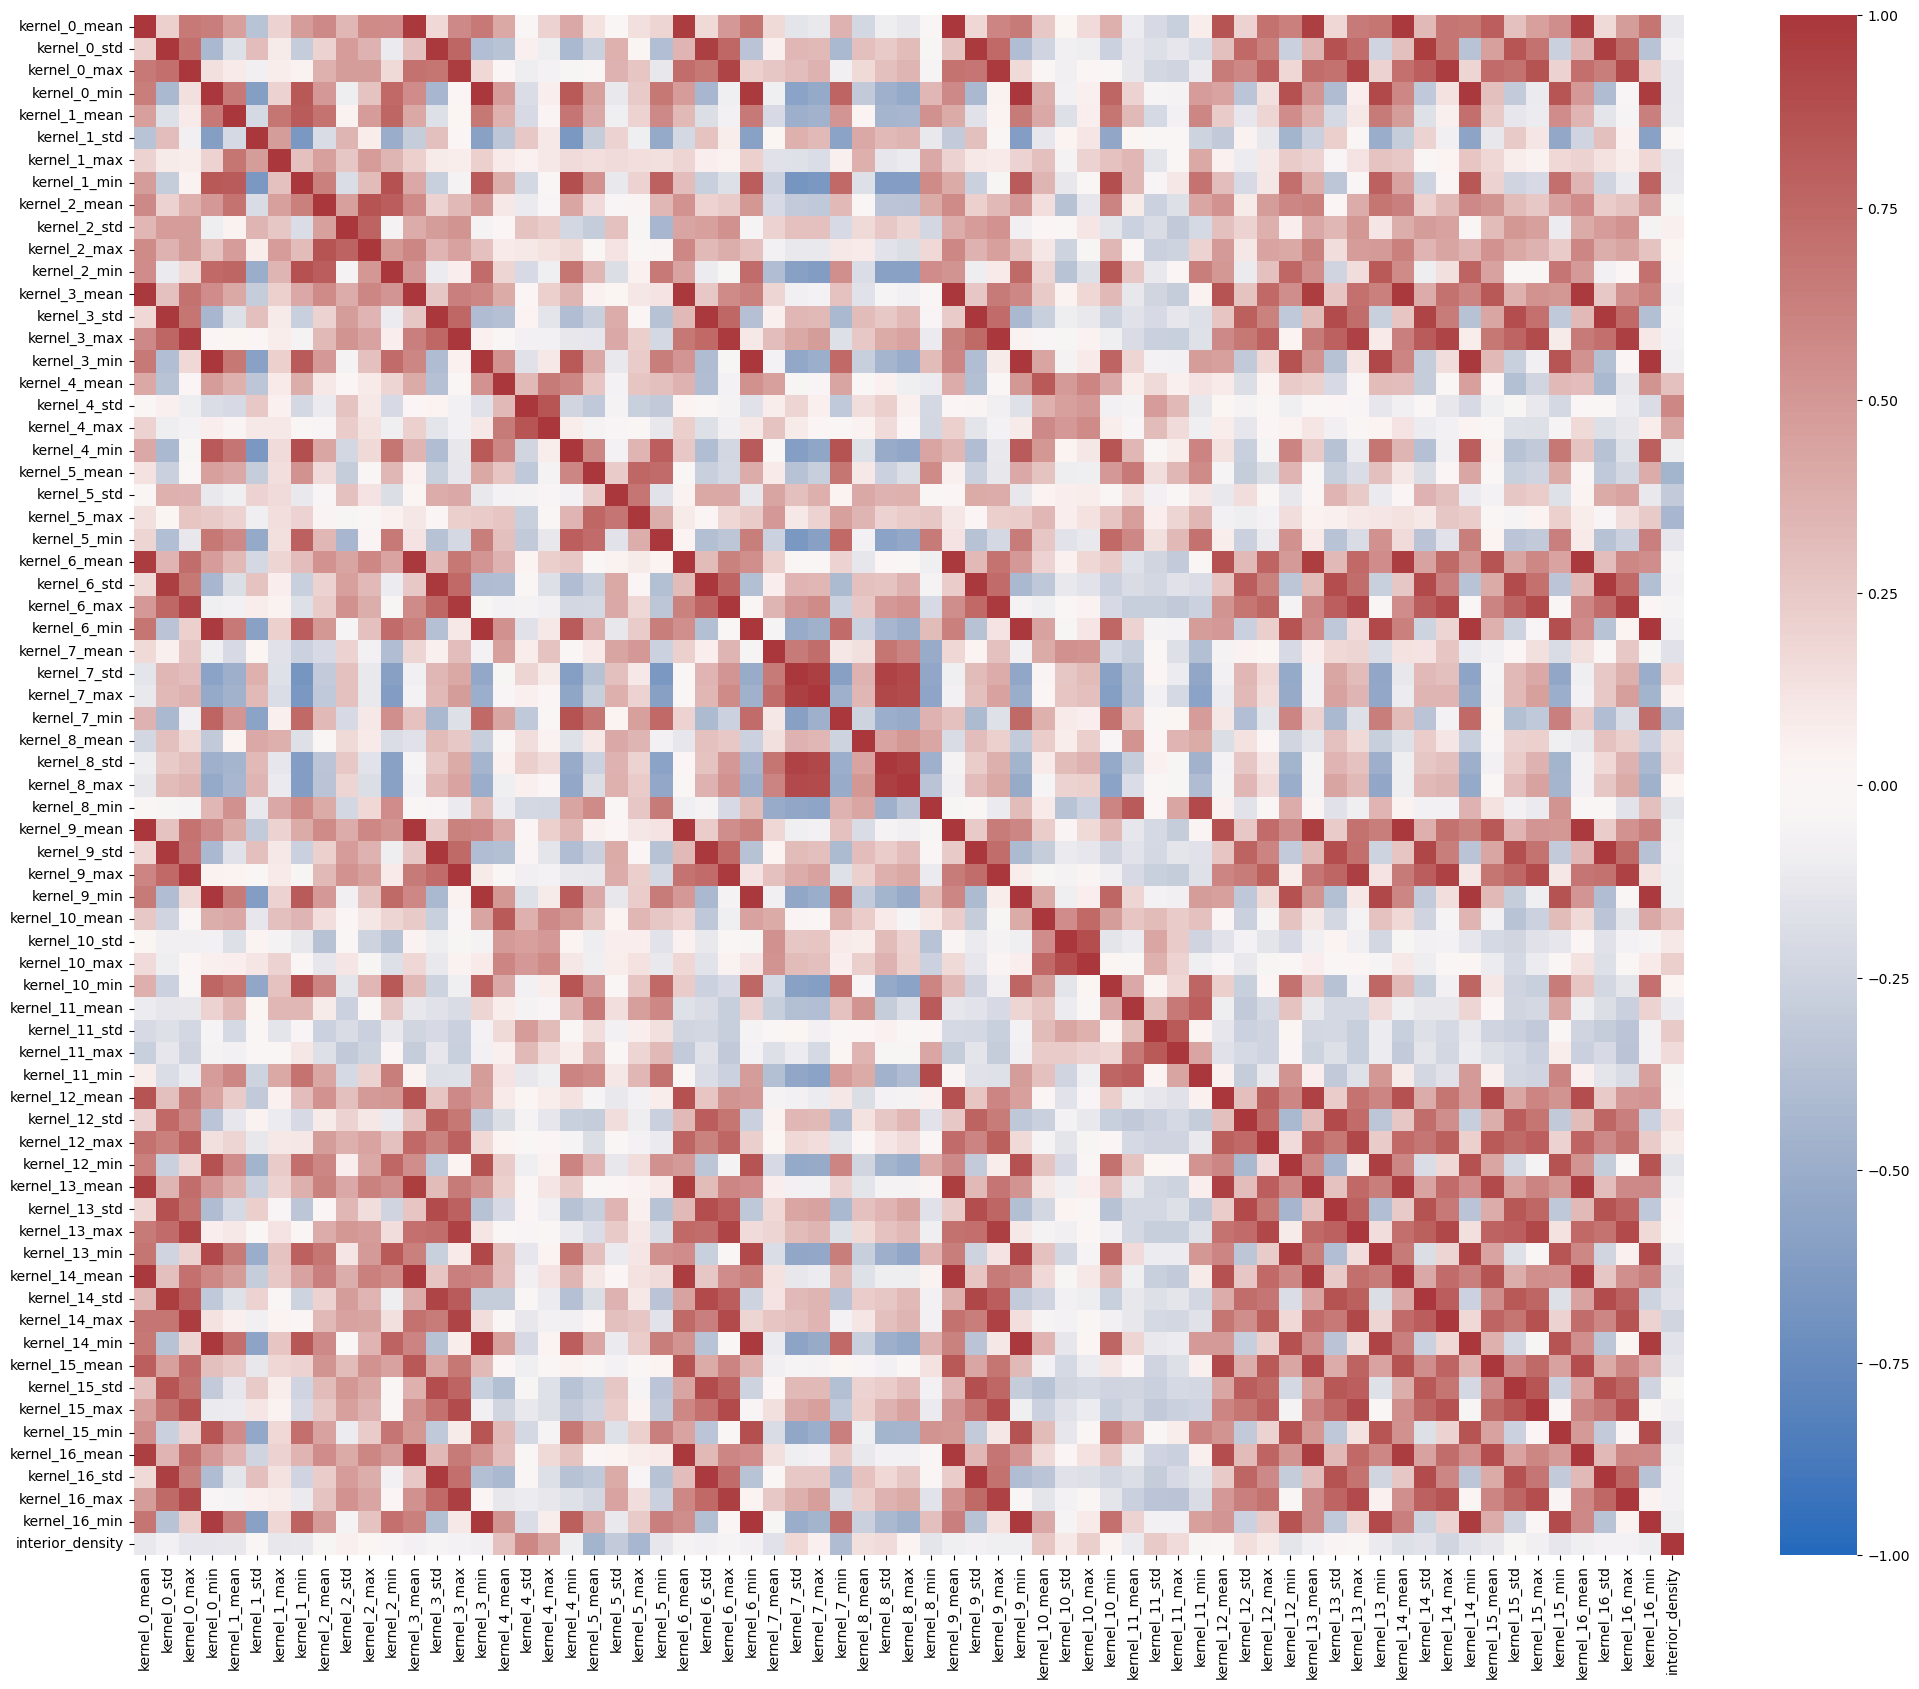

In [35]:
df_pole_interior_gabor = full_df[[f'kernel_{prod[0]}_{prod[1]}' for prod in product(*[kernels, kernel_stats])] + ['interior_density', 'pole_id']]
cmat = df_pole_interior_gabor.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
fix, ax = plt.subplots(figsize=(25,20))
sns.heatmap(cmat, cmap='vlag', vmin=-1, vmax=1, ax=ax)

In [36]:
cmat['interior_density'].sort_values()

kernel_5_mean      -0.458801
kernel_5_max       -0.434152
kernel_7_min       -0.404790
kernel_5_std       -0.300377
kernel_14_max      -0.235815
                      ...   
kernel_10_mean      0.269075
kernel_4_mean       0.294845
kernel_4_max        0.431435
kernel_4_std        0.579749
interior_density    1.000000
Name: interior_density, Length: 69, dtype: float64

Interestingly enough, it seems like kernels 4 and 5 seem to have a somewhat high degree of correlation with the interior of the pole. It might be interesting to see this correlation in a pairplot, as usual.

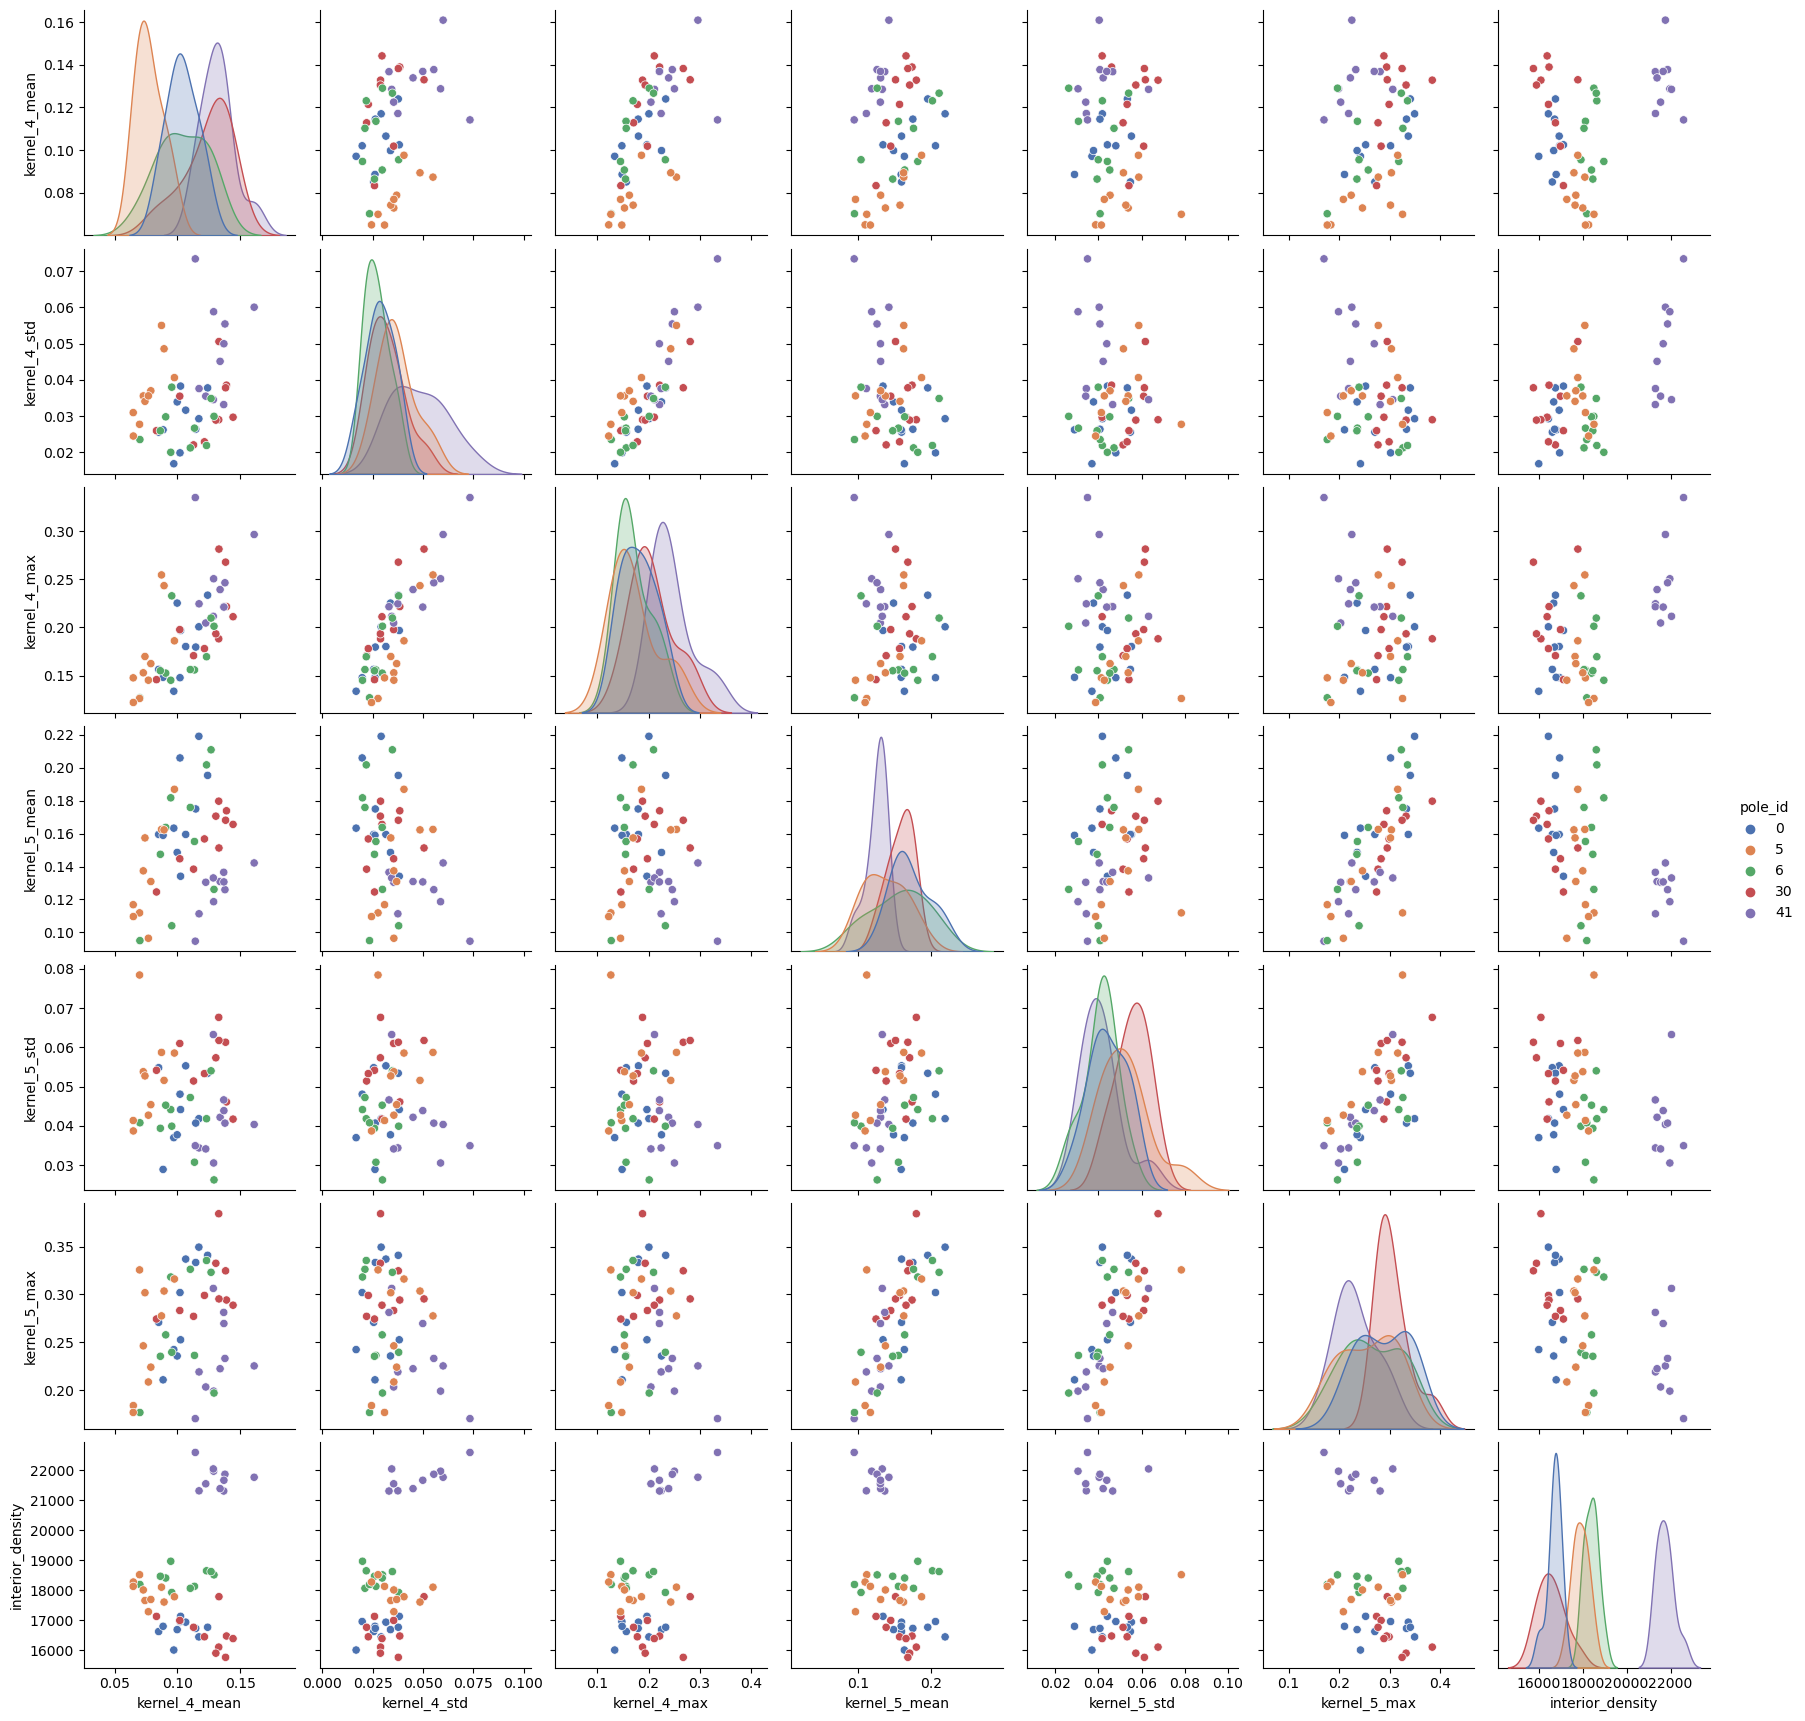

In [37]:
gabor_corr_columns = ['kernel_4_mean', 'kernel_4_std', 'kernel_4_max', 'kernel_5_mean', 'kernel_5_std', 'kernel_5_max', 'interior_density']
pg = sns.pairplot(df_pole_interior_gabor, vars=gabor_corr_columns, diag_kind='kde', hue='pole_id', palette='deep')

The patterns observed here are somewhat similar to what was seen for the pole surface: for these filters with high correlation, most values are in a straight vertical line, and the correlation seems to be highly influenced by the extreme values for pole 41.

#### Hyperspectral attributes

<Axes: >

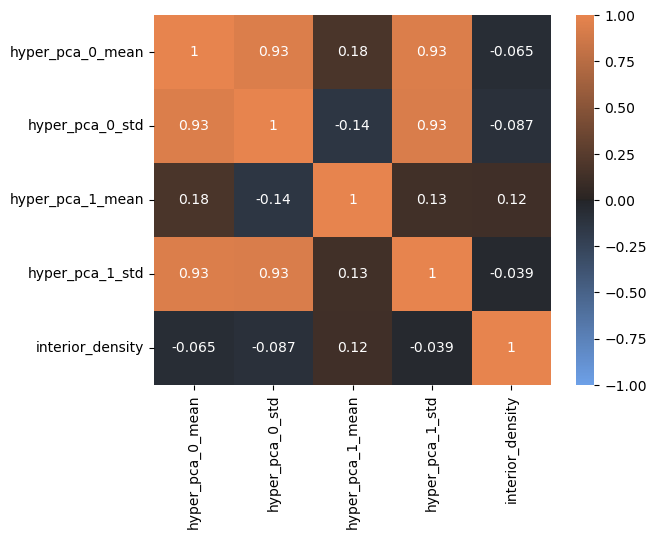

In [38]:
df_pole_interior_hyper = full_df[[f'hyper_pca_{prod[0]}_{prod[1]}' for prod in product(*[pcas, histogram_pca_stats])] + ['interior_density', 'pole_id']]
cmat = df_pole_interior_hyper.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True), vmin=-1, vmax=1, annot=True)

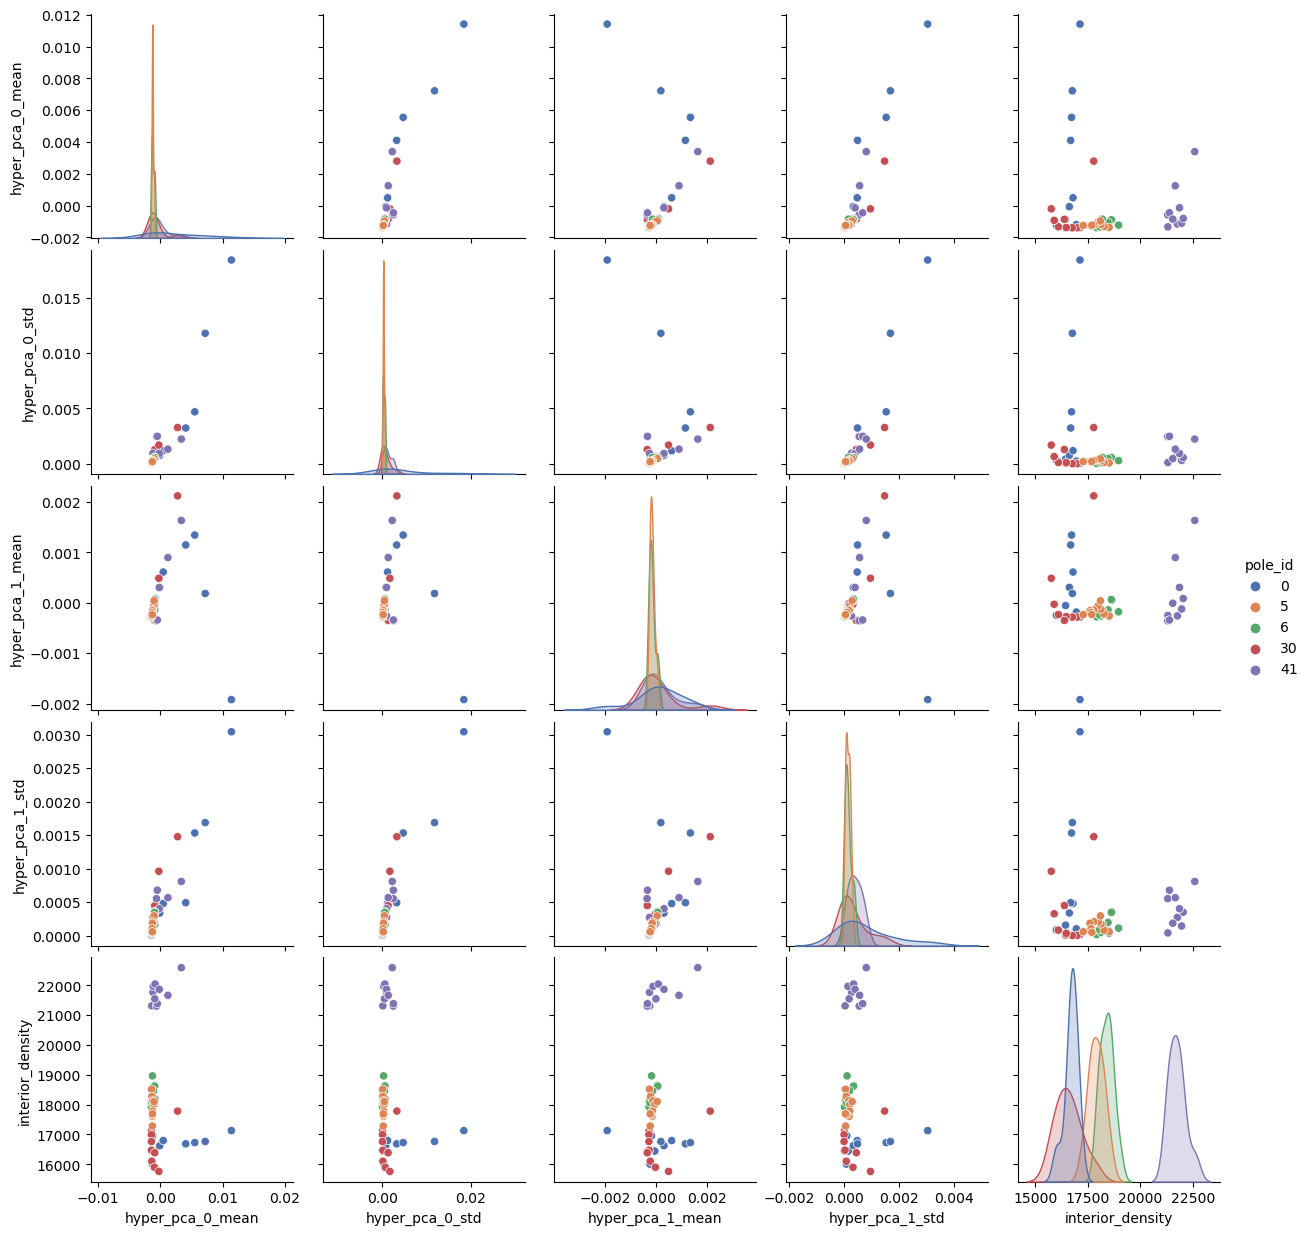

In [39]:
pg = sns.pairplot(df_pole_interior_hyper, diag_kind='kde', hue='pole_id', palette='deep')

Unfortunately, these hyperspectral PCA features seem to give no useful information about the pole density, as the correlations are also too small.

#### LiDAR attributes

<Axes: >

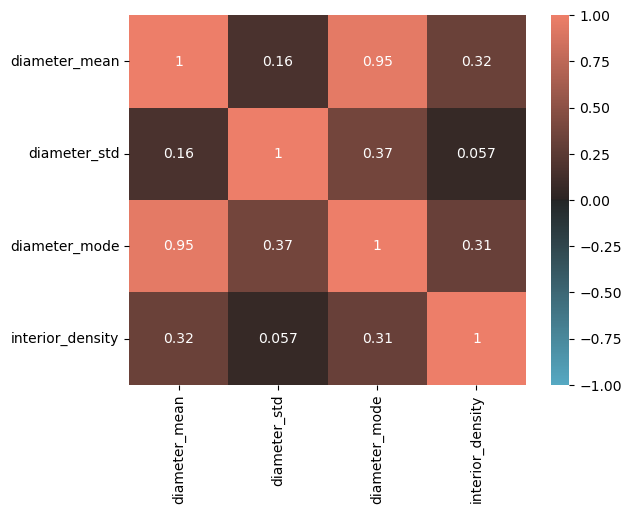

In [40]:
df_pole_interior_lidar = full_df[[f'diameter_{ft}' for ft in ['mean', 'std', 'mode']] + ['interior_density', 'pole_id']]
cmat = df_pole_interior_lidar.corr().drop('pole_id', axis=0).drop('pole_id', axis=1)
sns.heatmap(cmat, cmap=sns.diverging_palette(220, 20, l=65, center="dark", as_cmap=True), vmin=-1, vmax=1, annot=True)

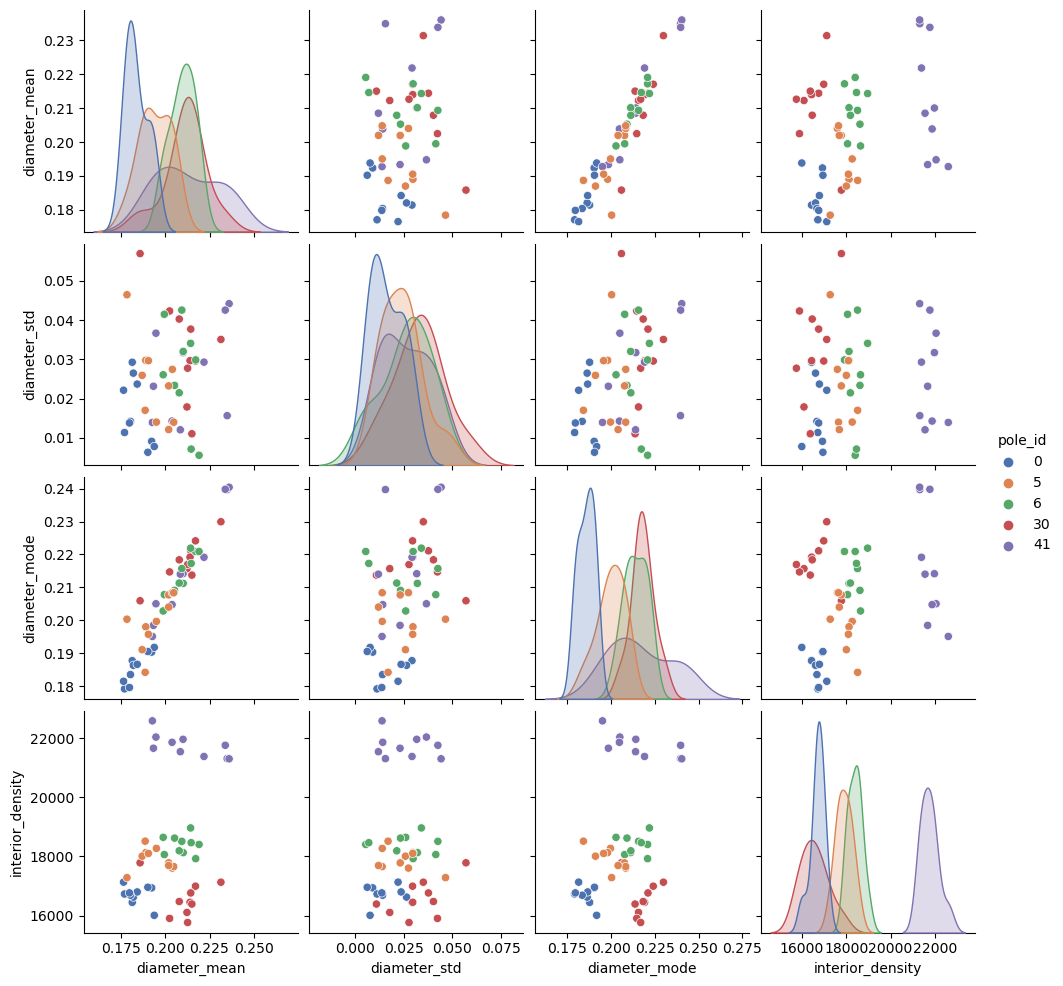

In [41]:
pg = sns.pairplot(df_pole_interior_lidar, diag_kind='kde', hue='pole_id', palette='deep')

Apparently, there are also no strong correlations with the pole interior density.

#### Conclusion

With respect to what was already seen in the pole surface and middle analysis, there are now new insights that could be derived from this section of the pole.

### Correlation conclusions

This analysis has allowed to gain some more insights:

- Despite previous intuition, it seems like the color histograms of the RGB pictures have more correlation with the density of the middle section of the pole than with the density of the surface section.
- Same thing happens with the correlation of the standard deviation of kernel 10: it seems to be slightly highly correlated with the density of the middle section.
- For obtaining the hyperspectral features, I ran PCA on the original scans. However, the resulting features seem to have no correlation with any of the densities. Perhaps I should use the full spectrum?
- The diameter estimate is correlated with the surface density, but not with the middle density.
- There seem to be high correlations with some pairs of variables, specially with statistics of the same values.

However, for the purposes of this analysis, the extreme density values of some of the poles (I'm looking at you, pole 41!) greatly distorts the correlation analysis. If I knew whether each pole is made from a distinct type of wood, I could correct this issue by dividing the density readings by the density of the specific type of wood.

As it has been seen in this previous analysis, the dimensionality of the dataset is big when compared against the number of samples. Namely, there are 50 samples and 96 different variables. Therefore, prior to conducting the study of which ML models can help solve this problem, it is good to see if a dimensionality reduction process can help with the future training process.

In the previous section, the correlations of single variables with each of the pole densities has been studied. Besides there being correlations of some variables with these densities, it is also good to ask whether there are correlations of pairs (or even triplets) of variables with the density readings. Therefore, this will be studied in this section of the notebook.

In [42]:
full_df.head()

pole_id  height_id  red_hist_mean  red_hist_std  green_hist_mean  \
0        0          0      33.285507      4.835364        26.735497   
1        0          1      35.829697      5.427175        27.231295   
2        0          2      37.949654      7.135076        27.734688   
3        0          3      40.802998      9.133465        28.866690   
4        0          4      42.525814      9.575470        28.284233   

   green_hist_std  blue_hist_mean  blue_hist_std  kernel_0_mean  kernel_0_std  \
0        1.298076       23.705713       1.772956       0.195063      0.063695   
1        1.663044       24.409092       1.308042       0.176415      0.027503   
2        2.493108       25.227655       1.805359       0.182092      0.019318   
3        3.269534       26.450733       1.511852       0.201333      0.041576   
4        2.337356       26.577112       1.061055       0.200909      0.031021   

   ...  hyper_pca_2_mean  hyper_pca_2_std  diameter_mean  diameter_std  \
0  ...          0.000208         0.000057       0.192331      0.009097   
1  ...          0.000200         0.000071       0.193794      0.007771   
2  ...          0.000215         0.000068       0.190182      0.006302   
3  ...          0.000291         0.000112       0.181370      0.029257   
4  ...          0.000347         0.000228       0.181995      0.026478   

   diameter_mode  surface_density  middle_density  interior_density  height  \
0       0.190355     15690.390625    17969.615234      16935.525391    98.0   
1       0.191790     15446.190430    17357.753906      16006.707031    98.0   
2       0.190532     15444.644531    17318.431641      16956.673828    98.0   
3       0.187760     15549.800781    17493.242188      16444.617188    98.0   
4       0.186343     15488.288086    17294.349609      16623.066406    98.0   

   diameter  
0      19.0  
1      19.0  
2      19.0  
3      19.0  
4      19.0  

[5 rows x 96 columns]